In [1]:
# -*- coding: utf-8 -*-

In [277]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from html_table_parser import parser_functions as parse
from time import sleep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
import lxml
import requests
import html5lib
pd.options.display.max_rows = 50

In [3]:
table_pages = ['https://en.wikipedia.org/wiki/List_of_battles_before_301',
                'https://en.wikipedia.org/wiki/List_of_battles_301%E2%80%931300',
               'https://en.wikipedia.org/wiki/List_of_battles_1301%E2%80%931600',
               'https://en.wikipedia.org/wiki/List_of_battles_since_2001']

In [4]:
list_pages = ['https://en.wikipedia.org/wiki/List_of_battles_1601%E2%80%931800',
               'https://en.wikipedia.org/wiki/List_of_battles_1801%E2%80%931900',
               'https://en.wikipedia.org/wiki/List_of_battles_1901%E2%80%932000',]

In [5]:
title_list = []
link_list = []

In [6]:
def list_battles(url):
    req = requests.get(url)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    bullets = era_soup.find_all('li')
    
    for bullet in bullets:
        if 'title' in str(bullet):
            if 'Action' or 'Battle' or 'Siege' or 'Operation' or 'Fall' in str(bullet):
                if 'List+of+battles' not in str(bullet):
                    if 'footer' not in str(bullet):
                        link = bullet.a['href']
                        link_list.append(link)

                        title = bullet.a['title']
                        title_list.append(title)
                    else:
                        print 'NEXT ENTRY: ' + str(bullet)
                else:
                    print 'NEXT ENTRY: ' + str(bullet)
            else:
                print 'NEXT ENTRY: ' + str(bullet)
        else: 
            print 'NEXT ENTRY' + str(bullet)
                    

In [7]:
for url in list_pages:
    list_battles(url)

200


c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file c:\users\earsht\appdata\local\continuum\anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


NEXT ENTRY<li class="toclevel-1 tocsection-1"><a href="#Early_17th_century_.281601.E2.80.9350.29"><span class="tocnumber">1</span> <span class="toctext">Early 17th century (1601–50)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-2"><a href="#Late_17th_century_.281651.E2.80.931700.29"><span class="tocnumber">2</span> <span class="toctext">Late 17th century (1651–1700)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-3"><a href="#Early_18th_century_.281701.E2.80.9350.29"><span class="tocnumber">3</span> <span class="toctext">Early 18th century (1701–50)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-4"><a href="#Late_18th_century_.281751.E2.80.931800.29"><span class="tocnumber">4</span> <span class="toctext">Late 18th century (1751–1800)</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-5"><a href="#External_links"><span class="tocnumber">5</span> <span class="toctext">External links</span></a></li>
NEXT ENTRY<li><a class="external text" href="h

200
NEXT ENTRY<li class="toclevel-1 tocsection-1"><a href="#1901.E2.80.931914"><span class="tocnumber">1</span> <span class="toctext">1901–1914</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-2"><a href="#1914.E2.80.931918"><span class="tocnumber">2</span> <span class="toctext">1914–1918</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-3"><a href="#1919.E2.80.931938"><span class="tocnumber">3</span> <span class="toctext">1919–1938</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-4"><a href="#1939.E2.80.931945"><span class="tocnumber">4</span> <span class="toctext">1939–1945</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-5"><a href="#1946.E2.80.931975"><span class="tocnumber">5</span> <span class="toctext">1946–1975</span></a></li>
NEXT ENTRY<li class="toclevel-1 tocsection-6"><a href="#1976.E2.80.932000"><span class="tocnumber">6</span> <span class="toctext">1976–2000</span></a></li>
NEXT ENTRY<li>Battle of Pantelleria 15 June - An Italian nav

In [8]:
df_late_battles = pd.concat([pd.Series(link_list), pd.Series(title_list)], axis = 1).drop_duplicates()

In [9]:
df_late_battles = df_late_battles.rename(columns = {0:'url', 1:'Battle'})

In [10]:
df_late_battles

,url,Battle
0,/wiki/Battle_of_Bantam,Battle of Bantam
2,/wiki/Siege_of_Nagykanizsa,Siege of Nagykanizsa
3,/wiki/Battle_of_Sluis_(1603),Battle of Sluis (1603)
5,/wiki/Battle_of_Bra%C8%99ov,Battle of Brașov
6,/wiki/Battle_of_Dobrynichi,Battle of Dobrynichi
8,/wiki/Battle_of_Kircholm,Battle of Kircholm
9,/wiki/Battle_of_Cape_Rachado,Battle of Cape Rachado
11,/w/index.php?title=Battle_of_Gol&action=edit&r...,Battle of Gol (page does not exist)
12,/wiki/Siege_of_Groenlo_(1606)#Spinola.27s_siege,Siege of Groenlo (1606)
13,/wiki/Battle_of_Gibraltar_(1607),Battle of Gibraltar (1607)


In [11]:
df_late_battles[~df_late_battles['Battle'].str.contains('Battle' or 'Operation')]

,url,Battle
2,/wiki/Siege_of_Nagykanizsa,Siege of Nagykanizsa
12,/wiki/Siege_of_Groenlo_(1606)#Spinola.27s_siege,Siege of Groenlo (1606)
15,/wiki/Siege_of_Troitse-Sergiyeva_Lavra,Siege of Troitse-Sergiyeva Lavra
18,/wiki/Siege_of_Smolensk_(1609%E2%80%9311),Siege of Smolensk (1609–11)
21,/wiki/English_East_India_Company,English East India Company
27,/wiki/Siege_of_Plze%C5%88,Siege of Plzeň
43,/wiki/Capture_of_Bahia,Capture of Bahia
46,/wiki/Siege_of_Breda_(1624),Siege of Breda (1624)
47,/wiki/Recapture_of_Bahia,Recapture of Bahia
49,/wiki/Action_of_1_February_1625,Action of 1 February 1625


In [12]:
df_late_battles.to_csv('battle_list_1600-', encoding = 'utf-8')

In [13]:
df_late_battles = pd.read_csv('battle_list_1600-.csv', encoding = 'utf-8')

In [14]:
df_late_battles = df_late_battles.drop(['Column1', 'Column4'], axis = 1)
df_late_battles.columns = df_late_battles.iloc[0]
df_late_battles = df_late_battles.drop(0)

In [15]:
battle_list = []
link_list = []

In [16]:
def early_battles(link):
    req = requests.get(link)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    tables = era_soup.find_all('table', {'class': 'wikitable'})

    for table in tables:
        cells= table.find_all('td')
        for cell in cells:
            if cell.a is not None:
                a = ['Fall', 'Battle', 'Siege', 'Capture', 'Operation', 'Action']
                if any(x in str(cell.a['href']) for x in a):
                    battle_list.append(cell.a['title'])
                    link_list.append(cell.a['href'])

In [17]:
for page in table_pages:
    early_battles(page)

200
200
200
200


In [18]:
df_battles = pd.DataFrame({'battle': battle_list,
                          'link':link_list})

In [19]:
df_battles = df_battles.rename(columns = {'link':'url', 'battle':'Battle'})

In [20]:
len(df_battles)

1600

In [21]:
len(df_late_battles)

1990

In [22]:
df_battles.head()

,Battle,url
0,Battle of Banquan,/wiki/Battle_of_Banquan
1,Battle of Zhuolu,/wiki/Battle_of_Zhuolu
2,Battle of Uruk,/wiki/Battle_of_Uruk
3,Battle of Mingtiao,/wiki/Battle_of_Mingtiao
4,Battle of the Ten Kings,/wiki/Battle_of_the_Ten_Kings


In [23]:
df_url = pd.concat([df_late_battles, df_battles]).reset_index(drop = True)

In [24]:
len(df_url)

3590

In [25]:
len(df_url.drop_duplicates())

3578

In [26]:
s_req = requests.get('https://en.wikipedia.org/Alexander_the_Great')

soup = BeautifulSoup(s_req.text)

ul = soup.find('ul', {'class':'redirectText'})

In [27]:
if ul is not None:
    print 'works'

In [28]:
df_battle_all = pd.DataFrame()
df_battle = pd.DataFrame()
def table_scrape(url, name):
#     sleep(1)
    
    link = 'https://en.wikipedia.org' + url
    
    b_req = requests.get(link)

    soup = BeautifulSoup(b_req.text)
    
    bell = soup.find('table', {'class':'infobox vevent'})
    
    if bell is not None:


        details = pd.DataFrame(parse.make2d(bell))
    else:
        return b_req
    clean_rows = details.drop_duplicates(0).set_index(0,drop = True).loc[['Date', 'Location', 'Result'],:]

    clean_col = clean_rows.transpose().reset_index(drop = True)
    
    if 'Commanders and leaders' in str(details[0]):
        nothing = 'nothing'
    
    else:
        return link


    
    df_x_bells = pd.DataFrame()

    html_table = bell.find_all('tr')
    bell_list = []
    bell_y_list = []
    
    for index, cell in zip(range(0, len(html_table)), html_table):
        if 'Commanders and leaders' in str(cell):
            leaders = html_table[index + 1]
            cells = leaders.find_all('td')
            count = 0
            for cell in cells:
                count += 1
                anchors = cell.find_all('a')
                for anchor in anchors:
                    if 'title' in str(anchor):
                        if 'class="image"' in str(anchor):
                            cl = 'image'
                        elif 'class="thumbborder"' in str(anchor):
                            cl = 'thumb'
                        elif 'cite_note' in str(anchor):
                            cl = 'cite'
                        elif 'disambiguation needed' in str(anchor):
                            cl = 'disam'
                        elif 'cnote_g' in str(anchor):
                            cl = 'cnote'
                        else:
                            title = anchor['title']
                            if any(title == x for x in ['Napoleon I','Alexander III of Macedon']):
                                print 'napoleon or alex redirect'
                            
                            ref = anchor['href']
                            link = 'https://en.wikipedia.org' + ref
                            
                            if len(ref) <= 10:
                                t_req = requests.get(link)
                            elif any(ref[8] + ref[9] + ref[10] == x for x in ['tr.', 'ko.', 'ja.', 'th.','da.', 'es.', 'de.', 'it.', 'fr.', 'zh.']):
                                print 'Not English!'
                                link = ref
                                t_req = requests.get(link)
                            elif soup.find('ul', {'class':'redirectText'}) is not None:
                                print 'REDIRECT'
                                print title
                                ul = soup.find('ul', {'class':'redirectText'})
                                a = ul.a
                                redirect = a['href']
                                link = 'https://en.wikipedia.org' + redirect
                                t_req = requests.get(link)
                            else:
                                t_req = requests.get(link)
                       
                            t_soup = BeautifulSoup(t_req.text)
                            if 'Common military ranks in English' in str(t_soup):
                                return t_soup
                                
                            c_name = t_soup.find('title')
                            c_name = str(c_name)
        
                            if c_name:
                                c_name = c_name.replace(' - Wikipedia', '').replace('<title>', '').replace('</title>', '')
                            if 'ex.php?title=' in ref:
                                ref = ref.replace('ex.php?title=', '')
                                ref = ref.replace('&action=edit&redlink=1', '')

                            omit_list = ['Military advisor', 'Wounded in action', 'Prisoner of war', 'Killed in action', 'Surrender (military)', 'Surrendered']
                                
                            if all(c_name != x for x in omit_list):
                                
                            
                                if count == 1:
                                    
                                    bell_list.append(c_name)
                                elif count == 2:
                                    bell_y_list.append(c_name)
    

    for bell in bell_list:
        clean_col['belligerent'] = bell
        df_x_bells = pd.concat([df_x_bells, clean_col])
        df_x_bells = df_x_bells.reset_index(drop = True)

    
    df_y_bells = pd.DataFrame()
    for bell in bell_y_list:
        clean_col['belligerent'] = bell
        df_y_bells = pd.concat([df_y_bells, clean_col])
        df_y_bells = df_y_bells.reset_index(drop = True)
    
    df_y_bells = df_y_bells.rename(columns = {0:'Location'})
    
    if 'Strength' in str(details[0]):
        strength_finder = details[details[0] == 'Strength']
    else:
        return name

    strength_row = strength_finder.index + 1

    strength = details.loc[strength_row]

    strength_x = strength.iloc[0,0]

    strength_y = strength.iloc[0,1]
    
    df_x_bells['own'] = strength_x
    
    df_x_bells['opp'] = strength_y

    df_y_bells['own'] = strength_y
    
    df_y_bells['opp'] = strength_x
    
    if 'Casualties and losses' not in str(details[0]):
        df_x_bells['taken'] = np.NaN
        df_x_bells['inflicted'] = np.NaN
        df_y_bells['taken'] = np.NaN
        df_y_bells['inflicted'] = np.NaN
    
    else:
    
        casualties_finder = details[details[0] == 'Casualties and losses']

        casualties_row = casualties_finder.index + 1

        casualties = details.loc[casualties_row]

        casualties_x = casualties.iloc[0,0]

        casualties_y = casualties.iloc[0,1]

        df_x_bells['taken'] = casualties_x

        df_x_bells['inflicted'] = casualties_y

        df_y_bells['taken'] = casualties_y

        df_y_bells['inflicted'] = casualties_x
    
    
    
    df_x_bells['Battle'] = name
    
    df_y_bells['Battle'] = name
    
    df_x_bells['pos'] = 'L'
    
    df_y_bells['pos'] = 'R'
    
    df_battle = pd.concat([df_x_bells, df_y_bells]).reset_index(drop = True)

    df_battle_all = pd.concat([df_battle_all, df_battle]).reset_index(drop = True).drop_duplicates()
    
    global df_battle_all

<ipython-input-28-0f2ef4c7efad>:183: SyntaxWarning: name 'df_battle_all' is assigned to before global declaration
  global df_battle_all


In [29]:
count = 0
for num, rows in {1:df_url[:200],
             2:df_url[200:400], 
             3:df_url[400:600], 
             4:df_url[600:800],
             5:df_url[800:1000],
             6:df_url[1000:1200],
             7:df_url[1200:1400],
             8:df_url[1400:1600],
             9:df_url[1600:1800],
             10:df_url[1800:2000],
             11:df_url[2000:2200],
             12:df_url[2200:2400],
             13:df_url[2400:2600],
             14:df_url[2600:2800],
             15:df_url[2800:3000],
             16:df_url[3000:3200],
             17:df_url[3200:3400],
             18:df_url[3400:]}.iteritems():
    df_battle = pd.DataFrame()
    df_batch = rows
    for index, row in df_batch.iterrows():
        count += 1
        global count
        print str(count) + '/' + str(len(df_url))
        table_scrape(row['url'], row['Battle'])
    df_battle_all.to_csv('rows_{}.csv'.format(num), encoding = 'utf-8')
    print 'NEW FRAME' + str(num)

<ipython-input-29-092b1f644c94>:24: SyntaxWarning: name 'count' is assigned to before global declaration
  global count


1/3590
2/3590
3/3590
4/3590
5/3590
6/3590
7/3590
8/3590
9/3590
10/3590
11/3590
12/3590
13/3590
14/3590
15/3590
16/3590
17/3590
18/3590
19/3590
20/3590
21/3590
22/3590
Not English!
23/3590
24/3590
25/3590
26/3590
27/3590
28/3590
29/3590
30/3590
31/3590
32/3590
33/3590
34/3590
35/3590
36/3590
37/3590
38/3590
39/3590
40/3590
41/3590
42/3590
43/3590
44/3590
45/3590
46/3590
47/3590
48/3590
49/3590
50/3590
51/3590
52/3590
53/3590
54/3590
55/3590
56/3590
57/3590
58/3590
59/3590
60/3590
61/3590
62/3590
63/3590
64/3590
65/3590
66/3590
67/3590
68/3590
69/3590
70/3590
71/3590
72/3590
73/3590
74/3590
75/3590
76/3590
77/3590
78/3590
79/3590
80/3590
81/3590
82/3590
83/3590
84/3590
85/3590
86/3590
87/3590
88/3590
89/3590
90/3590
91/3590
92/3590
93/3590
94/3590
95/3590
96/3590
97/3590
98/3590
99/3590
100/3590
101/3590
102/3590
103/3590
104/3590
105/3590
106/3590
107/3590
108/3590
109/3590
110/3590
111/3590
112/3590
113/3590
114/3590
115/3590
116/3590
117/3590
118/3590
119/3590
120/3590
121/3590
122/35

881/3590
882/3590
883/3590
884/3590
885/3590
886/3590
887/3590
888/3590
889/3590
890/3590
891/3590
892/3590
893/3590
894/3590
895/3590
896/3590
897/3590
Not English!
898/3590
899/3590
900/3590
901/3590
902/3590
903/3590
904/3590
905/3590
906/3590
907/3590
908/3590
909/3590
910/3590
911/3590
912/3590
913/3590
914/3590
915/3590
916/3590
917/3590
918/3590
919/3590
920/3590
921/3590
922/3590
923/3590
924/3590
925/3590
926/3590
927/3590
928/3590
929/3590
930/3590
931/3590
932/3590
933/3590
934/3590
935/3590
936/3590
937/3590
938/3590
939/3590
940/3590
941/3590
942/3590
943/3590
944/3590
945/3590
946/3590
947/3590
948/3590
949/3590
950/3590
951/3590
952/3590
953/3590
954/3590
955/3590
956/3590
957/3590
958/3590
959/3590
960/3590
961/3590
962/3590
963/3590
964/3590
965/3590
966/3590
967/3590
968/3590
969/3590
970/3590
971/3590
972/3590
973/3590
974/3590
975/3590
976/3590
977/3590
978/3590
979/3590
980/3590
981/3590
982/3590
983/3590
984/3590
985/3590
986/3590
987/3590
988/3590
989/3590
990/35

1690/3590
1691/3590
1692/3590
1693/3590
1694/3590
1695/3590
1696/3590
1697/3590
1698/3590
1699/3590
1700/3590
1701/3590
1702/3590
1703/3590
1704/3590
1705/3590
1706/3590
1707/3590
1708/3590
1709/3590
1710/3590
1711/3590
1712/3590
1713/3590
1714/3590
1715/3590
1716/3590
1717/3590
1718/3590
1719/3590
1720/3590
1721/3590
1722/3590
1723/3590
1724/3590
1725/3590
1726/3590
1727/3590
1728/3590
1729/3590
1730/3590
1731/3590
1732/3590
1733/3590
1734/3590
1735/3590
1736/3590
1737/3590
1738/3590
1739/3590
1740/3590
1741/3590
1742/3590
1743/3590
1744/3590
1745/3590
1746/3590
1747/3590
1748/3590
1749/3590
1750/3590
1751/3590
1752/3590
1753/3590
1754/3590
1755/3590
1756/3590
1757/3590
1758/3590
1759/3590
1760/3590
1761/3590
1762/3590
1763/3590
1764/3590
1765/3590
1766/3590
1767/3590
1768/3590
1769/3590
1770/3590
1771/3590
1772/3590
1773/3590
1774/3590
1775/3590
1776/3590
1777/3590
1778/3590
1779/3590
1780/3590
1781/3590
1782/3590
1783/3590
1784/3590
1785/3590
1786/3590
1787/3590
1788/3590
1789/3590


2505/3590
2506/3590
2507/3590
2508/3590
2509/3590
2510/3590
2511/3590
2512/3590
2513/3590
2514/3590
2515/3590
2516/3590
2517/3590
2518/3590
2519/3590
2520/3590
2521/3590
2522/3590
2523/3590
2524/3590
2525/3590
2526/3590
2527/3590
2528/3590
2529/3590
2530/3590
2531/3590
2532/3590
2533/3590
2534/3590
2535/3590
2536/3590
2537/3590
2538/3590
2539/3590
2540/3590
2541/3590
2542/3590
2543/3590
2544/3590
2545/3590
2546/3590
2547/3590
2548/3590
2549/3590
2550/3590
2551/3590
2552/3590
2553/3590
2554/3590
2555/3590
2556/3590
2557/3590
2558/3590
2559/3590
2560/3590
2561/3590
2562/3590
2563/3590
2564/3590
2565/3590
2566/3590
2567/3590
2568/3590
2569/3590
2570/3590
2571/3590
2572/3590
2573/3590
2574/3590
2575/3590
2576/3590
2577/3590
2578/3590
2579/3590
2580/3590
2581/3590
2582/3590
2583/3590
2584/3590
2585/3590
2586/3590
2587/3590
2588/3590
2589/3590
2590/3590
2591/3590
2592/3590
2593/3590
2594/3590
2595/3590
2596/3590
2597/3590
2598/3590
2599/3590
2600/3590
NEW FRAME13
2601/3590
2602/3590
2603/359

3297/3590
3298/3590
3299/3590
3300/3590
3301/3590
3302/3590
3303/3590
3304/3590
3305/3590
3306/3590
3307/3590
3308/3590
3309/3590
3310/3590
3311/3590
3312/3590
3313/3590
3314/3590
3315/3590
3316/3590
3317/3590
3318/3590
3319/3590
3320/3590
3321/3590
3322/3590
3323/3590
3324/3590
3325/3590
3326/3590
3327/3590
3328/3590
3329/3590
3330/3590
3331/3590
3332/3590
3333/3590
3334/3590
3335/3590
3336/3590
3337/3590
3338/3590
3339/3590
3340/3590
3341/3590
3342/3590
3343/3590
3344/3590
3345/3590
3346/3590
3347/3590
3348/3590
3349/3590
3350/3590
3351/3590
3352/3590
3353/3590
3354/3590
3355/3590
3356/3590
3357/3590
3358/3590
3359/3590
3360/3590
3361/3590
3362/3590
3363/3590
3364/3590
3365/3590
3366/3590
3367/3590
3368/3590
3369/3590
3370/3590
3371/3590
3372/3590
3373/3590
3374/3590
3375/3590
3376/3590
3377/3590
3378/3590
3379/3590
3380/3590
3381/3590
3382/3590
3383/3590
3384/3590
3385/3590
3386/3590
3387/3590
3388/3590
3389/3590
3390/3590
3391/3590
3392/3590
3393/3590
3394/3590
3395/3590
3396/3590


In [52]:
row_list = ['rows_1.csv',
 'rows_2.csv',
 'rows_3.csv',
 'rows_4.csv',
 'rows_5.csv',
 'rows_6.csv',
 'rows_7.csv',
 'rows_8.csv',
 'rows_9.csv',
 'rows_10.csv',
 'rows_11.csv',
 'rows_12.csv',
 'rows_13.csv',
 'rows_14.csv',
 'rows_15.csv',
 'rows_16.csv',
 'rows_17.csv',
 'rows_18.csv']

In [53]:
df_comm = pd.DataFrame()
for sheet in row_list:
    df_rows = pd.read_csv(sheet)
    df_comm = pd.concat([df_comm, df_rows]).reset_index(drop = True)

In [54]:
df_comm = df_comm.drop('Unnamed: 0', axis = 1)

In [55]:
len(df_comm)

105012

In [56]:
df_comm.to_csv('battles_dirty.csv', encoding = 'utf-8')

In [7]:
df_comm = pd.read_csv('battles_dirty.csv').drop('Unnamed: 0', axis = 1)

In [8]:
df_comm = df_comm.drop_duplicates()

In [9]:
len(df_comm)

10966

In [10]:
df_comm[df_comm.belligerent.str.contains('Napoleon')]

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
3313,Siege_of_Toulon,29 August – 19 December 1793,"Toulon, France",French Republican victory,Napoleon,"about 4,000 dead","about 22,000\r\r\n37 British ships\r\r\n32 Spa...","32,000 [1]",L,"2,000 dead or wounded,\r\r\n14 French ships of..."
3383,Battle_of_Montenotte,11 and 12 April 1796,"near Cairo Montenotte,[note 1] Italy",French victory,Napoleon,"2,500, 12 guns","6,000, 12 guns","9,000, 18 guns",L,880
3389,Battle_of_Lodi,10 May 1796,"Lodi, present-day Italy",French victory,Napoleon,"3,200 killed or wounded\r\r\n2,000 captured\r\...","9,500\r\r\n14 guns[1]","15,500 infantry\r\r\n2,000 cavalry\r\r\n30 guns",L,"1,000"
3395,Battle_of_Castiglione,5 August 1796,"Castiglione delle Stiviere, present-day Italy",French victory,Napoleon,"Battle: 3,000, 20 guns","Battle: 25,000","Battle: 30,000",L,"Battle: 1,300"
3401,Battle_of_Bassano,8 September 1796,"Bassano, Venetia, present-day Italy",French victory,Napoleon,"600 killed or wounded,\r\r\n3,000 captured,\r\...","11,000","20,000",L,"400 killed, wounded or missing"
3403,Battle_of_the_Bridge_of_Arcole,15 November 1796 (1796-11-15)–\r\r\n17 Novembe...,"Arcole, present-day Italy\r\r\nCoordinates: 45...",French victory[1],Napoleon,"2,200 dead or wounded\r\r\n4,000 men & 11 guns...","24,000","20,000[2]",L,"3,500 dead or wounded\r\r\n1,300 captured or m..."
3407,Battle_of_Mondovì,21 April 1796,"Mondovì, Piedmont, in modern-day Italy",French victory,Napoleon,"1,600, 8 cannons[1]","13,000[1]","17,500[1]",L,600[1]
3409,Battle_of_Rivoli,14–15 January 1797,"Rivoli Veronese, present-day Italy",Decisive French victory[1],Napoleon,"12,000-14,000","28,000","19,000",L,"3,200-5,000"
3450,Battle_of_the_Pyramids,21 July 1798,"Embabeh, near Cairo, Ottoman Egypt\r\r\n30°5′N...",Decisive French victory,Napoleon,"20,000 Mamelukes from Napoleon's own records[5...","25,000[3]","20,000 total\r\r\n3,000 cavalry\r\r\n17,000 in...",L,"29 dead, 260 wounded[4]"
3460,Siege_of_El_Arish,"February 11-19, 1799","Arish, Egypt",French victory,Napoleon,900 killed,"15,500","2,460",L,200 killed


In [11]:
len(df_comm.drop_duplicates())

10966

In [12]:
df_comm = df_comm.drop_duplicates().reset_index(drop = True)

In [13]:
df_comm.to_csv('battles_deduped.csv')

In [10]:
len(df_comm[df_comm.belligerent.str.contains('Napoleon')])

51

In [11]:
df_comm[df_comm.belligerent.str.contains('Scipio')]

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
7117,Battle of Tifernum,297 BC,"Città di Castello (Perugia, Umbria), Italy",Roman victory,Lucius Cornelius Scipio Barbatus,"3,400 dead,\r\r\n830 captured","25,000","20,000",L,"2,000 dead"
7140,Battle of the Lipara Islands,260 BC,"Lipara harbour, Sicily",Carthaginian victory,Gnaeus Cornelius Scipio Asina,4 ships,20 ships,17 ships,R,17 ships captured
7183,Battle of the Ticinus,"November, 218 BC","Right bank of lower Ticino River, present-day ...",Carthaginian victory,Publius Cornelius Scipio,minimal,"6,000 cavalry","3,100 cavalry\r\r\n7,200 velites",R,"2,300"
7186,Battle of Cissa,Fall 218 BC,"Cissa or Tarraco, present-day Spain",Roman victory,Gnaeus Cornelius Scipio Calvus,"6,000 killed,\r\r\n2,000 captured","10,000 infantry,\r\r\n1,000 cavalry","20,000 infantry,\r\r\n2,200 cavalry",R,unknown
7191,Battle of Ebro River,"Spring, 217 BC","Mouth of Ebro River, present-day Spain",Decisive Roman victory,Gnaeus Cornelius Scipio Calvus,"4 sunk,\r\r\n25 captured",40 Quinqueremes,55 Quinqueremes and Triremes,R,Unknown
7207,Battle of Dertosa,Spring 215 BC,"Tortosa, present-day Spain",Roman victory,Gnaeus Cornelius Scipio Calvus,Unknown,"25,000 infantry,\r\r\n4,000 cavalry,\r\r\n20 E...","30,000 infantry,\r\r\n2,800 cavalry",R,Unknown
7208,Battle of Dertosa,Spring 215 BC,"Tortosa, present-day Spain",Roman victory,Publius Cornelius Scipio,Unknown,"25,000 infantry,\r\r\n4,000 cavalry,\r\r\n20 E...","30,000 infantry,\r\r\n2,800 cavalry",R,Unknown
7230,Battle of the Upper Baetis,211 BC,Near Upper Baetis (modern-day Guadalquivir) Ri...,Carthaginian victory,Publius Cornelius Scipio,Unknown,"Total: 48,500,\r\r\n35,000 infantry,\r\r\n3,00...","Total: 53,000,\r\r\n30,000 infantry,\r\r\n3,00...",R,"About 22,000"
7231,Battle of the Upper Baetis,211 BC,Near Upper Baetis (modern-day Guadalquivir) Ri...,Carthaginian victory,Gnaeus Cornelius Scipio Calvus,Unknown,"Total: 48,500,\r\r\n35,000 infantry,\r\r\n3,00...","Total: 53,000,\r\r\n30,000 infantry,\r\r\n3,00...",R,"About 22,000"
7239,Battle of Baecula,208 BC,"Baecula (Santo Tomé, Jaén), present-day Spain",Roman victory; Hasdrubal departed Iberia witho...,Scipio Africanus,"About 6,000 killed,\r\r\n10,000 captured","25,000 men + Iberian allies","35,000 men",R,"2,000"


In [12]:
df_results = pd.read_csv('result_column.csv')

In [13]:
df_results[df_results.Battle == 'Battle_of_Camarón']

,Battle,belligerent,pos,Result,VorD
2987,Battle_of_Camarón,Francisco de Paula Milán,L,Tactical Mexican victory\r\nStrategic French v...,V
2988,Battle_of_Camarón,Jean Danjou,R,Tactical Mexican victory\r\nStrategic French v...,D
2989,Battle_of_Camarón,Jean Vilain — Wikipédia,R,Tactical Mexican victory\r\nStrategic French v...,D
2990,Battle_of_Camarón,Clément Maudet — Wikipédia,R,Tactical Mexican victory\r\nStrategic French v...,D


In [14]:
df_comm[df_comm.Battle == 'Battle_of_Camarón']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
3037,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Francisco de Paula Milán,43 killed\r\r\n19 captured of whom 17 were wou...,3 Foreign Legion Officers\r\r\n62 Legionnaires,"800 cavalry\r\r\n2,200 infantry",L,190 killed\r\r\n300+ wounded
3038,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Jean Danjou,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...
3039,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Jean Vilain — Wikipédia,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...
3040,Battle_of_Camarón,30 April 1863,"Camarón, near Palo Verde, Mexico",Tactical Mexican victory\r\r\nStrategic French...,Clément Maudet — Wikipédia,190 killed\r\r\n300+ wounded,"800 cavalry\r\r\n2,200 infantry",3 Foreign Legion Officers\r\r\n62 Legionnaires,R,43 killed\r\r\n19 captured of whom 17 were wou...


In [21]:
df_comm[df_comm.belligerent == 'Ambroise de Loré']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken
9181,Battle of La Brossinière,26 September 1423,"La Brossinière, France",French victory,Ambroise de Loré,"800-1,700 killed\r\r\n30 captured, including J...",2 000 soldiers\r\r\n800 archers,"6,000",L,1 knight\r\r\nand a few others (of no title)


In [15]:
df_vl = pd.merge(df_comm, df_results, how = 'outer', on = ['Battle', 'belligerent', 'Result', 'pos'])

In [16]:
df_vl

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,Heavy losses[2]\r\r\n3000 sick and wounded[1],"35,000[1]\r\r\n40+ cannon","9,000\r\r\n100 small cannon",L,Unknown,V
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor",Unknown,"9,000\r\r\n100 small cannon","35,000[1]\r\r\n40+ cannon",R,Heavy losses[2]\r\r\n3000 sick and wounded[1],D
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,414 killed[3](Spanish source)\r\r\n800 dead or...,"8 Galleys,\r\r\n1,130 soldiers[1](Spanish sour...","3 men-of-war,\r\r\n2 galleys,\r\r\nseveral min...",L,"720 killed,\r\r\n1 man-of-war sunk[3](Spanish ...",V
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"720 killed,\r\r\n1 man-of-war sunk[3](Spanish ...","3 men-of-war,\r\r\n2 galleys,\r\r\nseveral min...","8 Galleys,\r\r\n1,130 soldiers[1](Spanish sour...",R,414 killed[3](Spanish source)\r\r\n800 dead or...,D
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\n52°16′56″N 34°20′...",Russian decisive victory,False Dmitry I,?,"20,000","23,000",L,?,L
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\n52°16′56″N 34°20′...",Russian decisive victory,Fyodor Mstislavsky,?,"23,000","20,000",R,?,W
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"7,600–8,000 killed, captured and dispersed[2]","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...",L,"100 killed,\r\r\n200 wounded[1]:65",V
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"7,600–8,000 killed, captured and dispersed[2]","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...",L,"100 killed,\r\r\n200 wounded[1]:65",V
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\nSeptember 27, 1...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"100 killed,\r\r\n200 wounded[1]:65","3,600:[1]:64\r\r\n1,000 infantry\r\r\n2,600 ca...","10,868:[1]:64\r\r\n2,500 cavalry\r\r\n8,368 in...",R,"7,600–8,000 killed, captured and dispersed[2]",D
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,"2 ships lost\r\r\n150 dead, many wounded",11 ships,20 ships,L,2 ships lost\r\r\n500 dead,V


In [17]:
df_vl = df_vl.sort('VorD')

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [22]:
df_vl[df_vl.belligerent == 'Ambroise de Loré']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD
9181,Battle of La Brossinière,26 September 1423,"La Brossinière, France",French victory,Ambroise de Loré,"800-1,700 killed\r\r\n30 captured, including J...",2 000 soldiers\r\r\n800 archers,"6,000",L,1 knight\r\r\nand a few others (of no title),V


In [19]:
df_vl[df_vl.belligerent == 'Saracens']

,Battle,Date,Location,Result,belligerent,inflicted,opp,own,pos,taken,VorD


In [49]:
df_vl.to_csv('additional_results.csv')

In [59]:
df_ar = pd.read_csv('additional_results.csv', encoding = 'utf-8')

In [60]:
df_strength = df_ar.drop(['Unnamed: 0', 'Location', 'Result', 'inflicted', 'taken', 'opp'], axis = 1)

In [61]:
df_strength = df_strength.sort('Battle').reset_index(drop = True)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [ ]:
df_strength_dd = df_strength.drop_duplicates(['own', 'pos'], keep = 'first')

In [ ]:
df_strength_dd.own = df_strength_dd.own.str.replace('\r',' ').str.replace('\n', ' ').replace('\n', ' ')

In [ ]:
df_strength_dd = df_strength_dd.sort('Battle').reset_index(drop = True)

In [ ]:
df_strength_dd

In [ ]:
df_strength_dd.to_csv('strength_entry.csv', encoding = 'utf-8')

In [ ]:
df_strength_new = df_strength.drop_duplicates(['own', 'pos', 'Battle'], keep = 'first')

In [90]:
df_strength_fill = pd.read_excel('strength_entry.xlsx', encoding = 'utf-8')

In [62]:
df_battles = pd.read_csv('battles_deduped.csv', encoding = 'utf-8').drop('Unnamed: 0', axis = 1)

In [63]:
df_battles = df_battles.drop(['taken', 'inflicted'], axis = 1)

In [64]:
df_battles.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L


In [65]:
df_battles[df_battles.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,Location,Result,belligerent,opp,own,pos
1671,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Napoleon,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L
1672,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Louis-Nicolas Davout,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L
1673,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R
1674,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Charles William Ferdinand, Duke of Brunswick-W...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R


In [93]:
df_strength_fill[df_strength_fill.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
2289,Battle_of_Jena–Auerstedt,14 October 1806,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","120,500 60,000 (Jena); 60,500 (Auerstedt)",R,D,120500.0,NaN,NaN,NaN,NaN,NaN
2290,Battle_of_Jena–Auerstedt,14 October 1806,Napoleon,"67,000 40,000 (Jena); 27,000 (Auerstedt)",L,V,67000.0,NaN,NaN,NaN,NaN,NaN


In [92]:
df_strength_fill.Battle = df_strength_fill.Battle.str.replace(u"â€“",u'–')

In [158]:
df_some_strength = pd.merge(df_battles, df_strength_fill, how = 'outer', on = ['Battle', 'pos']).drop(['own_y', 'belligerent_y', 'Date_y'], axis = 1).rename(columns = {'Date_x':'Date','own_x':'own', 'belligerent_x':'belligerent'})

In [155]:
df_some_strength[df_some_strength.Battle.str.contains('Battle_of_Jena')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
1671,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Napoleon,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L,V,67000.0,NaN,NaN,NaN,NaN,NaN
1672,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,Louis-Nicolas Davout,"120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...",L,V,67000.0,NaN,NaN,NaN,NaN,NaN
1673,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Frederick Louis, Prince of Hohenlohe-Ingelfingen","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R,D,120500.0,NaN,NaN,NaN,NaN,NaN
1674,Battle_of_Jena–Auerstedt,14 October 1806,"Jena and Auerstedt, Germany\r\r\r\n50°57′00″N ...",Decisive French victory,"Charles William Ferdinand, Duke of Brunswick-W...","67,000\r\r\r\n40,000 (Jena);\r\r\r\n27,000 (Au...","120,500\r\r\r\n60,000 (Jena);\r\r\r\n60,500 (A...",R,D,120500.0,NaN,NaN,NaN,NaN,NaN


In [96]:
df_test = df_some_strength.iloc[:,9:]

In [97]:
df_str_two = df_some_strength[df_some_strength['Infantry'].isnull() & df_some_strength['Cavalry'].isnull() & df_some_strength['Artillery'].isnull() & df_some_strength['Ships'].isnull() & df_some_strength['Airforce'].isnull() & df_some_strength['Special'].isnull()]

In [98]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_str_two = df_str_two.drop_duplicates(['Battle', 'Date', 'Location', 'Result', 'pos']).drop('VorD', axis = 1)

In [100]:
len(df_str_two)

1353

In [101]:
df_merger = df_strength.drop(['Date', 'belligerent', 'own'], axis = 1)

In [102]:
df_merger = df_merger.drop_duplicates()

In [103]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df_str_two = pd.merge(df_str_two, df_merger, on = ['Battle', 'pos'], how = 'outer').dropna(subset = ['Date', 'Location', 'Result'])

In [196]:
df_str_two = df_str_two.dropna(subset = ['VorD'])

In [24]:
df_str_two.to_csv('strength_entry_two.csv')

In [199]:
df_str_two

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V
3,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D
6,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V
7,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D
9,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,"50,000","150,000",L,V
11,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Toyotomi Hideyori,"150,000","50,000",R,D
12,Siege_of_Plzeň,19 September - 21 November 1618\r\r\r\n(2 mont...,"Pilsen, Bohemia",Bohemian victory,Ernst von Mansfeld,"4,000 Burghers\r\r\r\n158 cavalry","20,000",L,V


In [186]:
df_partial = pd.read_excel('PARTIAL_strength_entry_two.xlsx', encoding = 'utf-8')

In [187]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df_str_two = df_str_two.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], axis = 1)

ValueError: labels ['Infantry' 'Cavalry' 'Artillery' 'Ships' 'Airforce' 'Special'] not contained in axis

In [189]:
df_partial = df_partial.drop(['Date', 'Location', 'Result', 'belligerent','own', 'Column1'],axis = 1)

In [190]:
df_partial.columns

Index([u'Battle', u'pos', u'Infantry', u'Cavalry', u'Artillery', u'Ships',
       u'Airforce', u'Special', u'VorD'],
      dtype='object')

In [194]:
df_str_two.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L


In [193]:
df_finish = pd.merge(df_str_two, df_partial, on = ['Battle', 'pos', 'VorD'], how = 'outer')

KeyError: 'VorD'

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L,23000,NaN,NaN,NaN,NaN,NaN
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W,20000,NaN,NaN,NaN,NaN,NaN
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
3,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V,15000,NaN,NaN,NaN,NaN,NaN
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
6,Siege_of_Smolensk_(1609–11),1609 to 1611,"near Smolensk, Russia",Polish victory,Sigismund III Vasa,"5,000 soldiers\r\r\r\n200 heavy guns","22,000 soldiers\r\r\r\n30 heavy guns",L,V,NaN,NaN,NaN,NaN,NaN,NaN
7,Siege_of_Smolensk_(1609–11),1609 to 1611,"near Smolensk, Russia",Polish victory,Mikhail Shein,"22,000 soldiers\r\r\r\n30 heavy guns","5,000 soldiers\r\r\r\n200 heavy guns",R,D,NaN,NaN,NaN,NaN,NaN,NaN
8,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Tennōji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,"50,000","150,000",L,V,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
drop_list = list(df_finish[df_finish['Date'].isnull()].index)

In [87]:
df_finish = df_finish.drop(drop_list)

In [90]:
df_finish.to_csv('last_strength_entry.csv', encoding = 'utf-8')

In [33]:
df_some_strength

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...","10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...",R,D,8368.0,2500.0,11.0,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_some_strength[df_some_strength.Battle.str.contains('Siege of La Rochelle')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
10109,Siege of La Rochelle (1572–73),November 1572 - July 1573,La Rochelle,Stalemate,Henry III of France,"Defending army: 1,500.\r\r\r\nHuguenot refugees.","Siege army: 28,000.",L,I,28000.0,NaN,NaN,NaN,NaN,NaN
10110,Siege of La Rochelle (1572–73),November 1572 - July 1573,La Rochelle,Stalemate,"Gabriel, comte de Montgomery","Defending army: 1,500.\r\r\r\nHuguenot refugees.","Siege army: 28,000.",L,I,28000.0,NaN,NaN,NaN,NaN,NaN


In [122]:
df_more_strength = pd.read_excel('last_strength_entry.xlsx')

In [123]:
df_more_strength.head()

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN


In [124]:
df_some_strength.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_more_strength = pd.merge(df_more_strength, df_str_two, on = ['Battle', 'pos'], how = 'outer').drop(['own_y', 'Infantry_y', 'Cavalry_y', 'Artillery_y', 'Ships_y', 'Airforce_y', 'Special_y', 'Date_y', 'Location_y', 'Result_y', 'belligerent_y'], axis = 1).dropna(subset = ['Date_x'])

In [132]:
df_more_strength.columns = df_more_strength.columns.str.replace('_x', '')

In [134]:
df_more_strength.head()

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special,opp
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN,"20,000"
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN,"23,000"
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN,11 ships
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN,"1,300-1,400"
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN,"2,400"


In [135]:
df_some_strength.head()

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df_more_strength

,Battle,Date,Location,Result,belligerent,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special,opp
0,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,False Dmitry I,23000,L,L,23000,NaN,NaN,NaN,NaN,NaN,"20,000"
1,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\r\n52Â°16â€²56â€...",Russian decisive victory,Fyodor Mstislavsky,20000,R,W,20000,NaN,NaN,NaN,NaN,NaN,"23,000"
2,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN,11 ships
3,Siege_of_Groenlo_(1606),3â€“14 August 1606 (Spinola)\r\r\r\r\n30 Octob...,"Groenlo, Gelderland\r\r\r\r\n(present-day the ...",1st Siege: Spanish victory\r\r\r\r\n2nd Siege:...,"Ambrogio Spinola, 1st Marquis of the Balbases",15000,L,V,15000,NaN,NaN,NaN,NaN,NaN,"1,300-1,400"
4,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Jan Piotr Sapieha,15000,L,D,15000,NaN,NaN,NaN,NaN,NaN,"2,400"
5,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\r\n56Â°...",Russian victory,Grigory Dolgorukov,2400,R,V,2400,NaN,NaN,NaN,NaN,NaN,"15,000"
6,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,ÅŒno Harunaga,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN,5000
7,Battle_of_TennÅji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Tokugawa Ieyasu,150000,L,V,150000,NaN,NaN,NaN,NaN,NaN,NaN
8,Battle_of_TennÅji,"June 3, 1615","Osaka Castle, Osaka, Japan and surrounding areas",Tokugawa victory; last resistance to Tokugawa ...,Toyotomi Hideyori,50000,R,D,50000,NaN,NaN,NaN,NaN,NaN,NaN
9,Siege_of_PlzeÅˆ,19 September - 21 November 1618\r\r\r\r\n(2Â m...,"Pilsen, Bohemia",Bohemian victory,Ernst von Mansfeld,20000,L,V,20000,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_fill_two = pd.merge(df_battles, df_more_strength, on = ['Battle', 'pos'], how = 'outer').drop(['Date_y', 
                                                                                    'Location_y', 
                                                                                    'belligerent_y', 
                                                                                    'Result_y', 'own_y', 
                                                                                    'opp_y'], axis = 1)

In [169]:
df_fill_two.columns = df_fill_two.columns.str.replace('_x', '')

In [171]:
df_some_strength = df_some_strength[df_some_strength['Infantry'].notnull() | df_some_strength['Cavalry'].notnull() | df_some_strength['Artillery'].notnull() | df_some_strength['Ships'].notnull() | df_some_strength['Airforce'].notnull() | df_some_strength['Special'].notnull()]

In [172]:
len(df_some_strength)

8819

In [173]:
df_fill_two = df_fill_two[df_fill_two['Infantry'].notnull() | df_fill_two['Cavalry'].notnull() | df_fill_two['Artillery'].notnull() | df_fill_two['Ships'].notnull() | df_fill_two['Airforce'].notnull() | df_fill_two['Special'].notnull()]

In [175]:
df_some_strength

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
0,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,Tiryaki Hasan Pasha,"35,000[1]\r\r\r\n40+ cannon","9,000\r\r\r\n100 small cannon",L,V,9000.0,NaN,100.0,NaN,NaN,NaN
1,Siege_of_Nagykanizsa,9 September 1601 – 18 November 1601,"Naģykanizsa, Ottoman Empire",Decisive Ottoman victory,"Ferdinand II, Holy Roman Emperor","9,000\r\r\r\n100 small cannon","35,000[1]\r\r\r\n40+ cannon",R,D,35000.0,NaN,40.0,NaN,NaN,NaN
2,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Joos de Moor,"8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...","3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...",L,V,NaN,NaN,NaN,5.0,NaN,NaN
3,Battle_of_Sluis_(1603),26 May 1603,Sluis (present-day Netherlands),Dutch victory,Federico Spinola,"3 men-of-war,\r\r\r\n2 galleys,\r\r\r\nseveral...","8 Galleys,\r\r\r\n1,130 soldiers[1](Spanish so...",R,D,NaN,NaN,NaN,8.0,NaN,NaN
6,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Jan Karol Chodkiewicz,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
7,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Hetmans of the Polish–Lithuanian Commonwealth,"10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...","3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...",L,V,1000.0,2600.0,5.0,NaN,NaN,NaN
8,Battle_of_Kircholm,"September 17, 1605 (O.S.)\r\r\r\nSeptember 27,...","Kircholm, present-day Salaspils, Latvia",Decisive Polish-Lithuanian victory,Charles IX of Sweden,"3,600:[1]:64\r\r\r\n1,000 infantry\r\r\r\n2,60...","10,868:[1]:64\r\r\r\n2,500 cavalry\r\r\r\n8,36...",R,D,8368.0,2500.0,11.0,NaN,NaN,NaN
10,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Cornelis Matelief de Jonge,20 ships,11 ships,R,L,NaN,NaN,NaN,11.0,NaN,NaN
12,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Maurice, Prince of Orange","15,000","1,300-1,400",R,D,1350.0,NaN,NaN,NaN,NaN,NaN
13,Battle_of_Gibraltar_(1607),25 April 1607,"Bay of Gibraltar, Spain\r\r\r\n(near present-d...",Decisive Dutch victory,Jacob van Heemskerk,10 galleons\r\r\r\nabout 12 smaller vessels[2]...,26 warships[1],L,V,NaN,NaN,NaN,26.0,NaN,NaN


In [174]:
df_fill_two

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,False Dmitry I,"20,000","23,000",L,L,23000,NaN,NaN,NaN,NaN,NaN
5,Battle_of_Dobrynichi,21 January 1605,"Near Dobrynichi, Russia\r\r\r\n52°16′56″N 34°2...",Russian decisive victory,Fyodor Mstislavsky,"23,000","20,000",R,W,20000,NaN,NaN,NaN,NaN,NaN
9,Battle_of_Cape_Rachado,16 to 18 August 1606,"Off Cape Rachado, Portuguese Malacca",Portuguese victory,Martim Afonso de Castro,11 ships,20 ships,L,V,NaN,NaN,NaN,20.0,NaN,NaN
11,Siege_of_Groenlo_(1606),3–14 August 1606 (Spinola)\r\r\r\n30 October -...,"Groenlo, Gelderland\r\r\r\n(present-day the Ne...",1st Siege: Spanish victory\r\r\r\n2nd Siege: S...,"Ambrogio Spinola, 1st Marquis of the Balbases","1,300-1,400","15,000",L,V,15000,NaN,NaN,NaN,NaN,NaN
14,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Jan Piotr Sapieha,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
15,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Aleksander Józef Lisowski,"2,400","15,000",L,D,15000,NaN,NaN,NaN,NaN,NaN
16,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Grigory Dolgorukov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
17,Siege_of_Troitse-Sergiyeva_Lavra,September 1608 to January 1610,"now Sergiev Posad, Moscow Oblast\r\r\r\n56°18′...",Russian victory,Aleksey Golokhvastov,"15,000","2,400",R,V,2400,NaN,NaN,NaN,NaN,NaN
30,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Ōno Harunaga,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN
31,Battle_of_Kashii,"May 26, 1615","Kashii, near Wakayama Castle, Kii Province, Japan",Toyotomi defeat and withdrawal,Hanawa Naoyuki,5000,3000,R,D,3000,NaN,NaN,NaN,NaN,NaN


In [182]:
df_all_strength = pd.concat([df_fill_two, df_some_strength]).reset_index(drop = True)

In [179]:
len(df_battles)

10966

In [207]:
df_char = df_all_strength[df_all_strength.Date.isnull()]

In [208]:
df_char.to_excel('special_character_fix.xlsx')

In [204]:
df_all_strength[df_all_strength.Battle.str.contains('Battle_of_Tenn')]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
1604,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,L,V,150000,NaN,NaN,NaN,NaN,NaN
1605,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,R,D,50000,NaN,NaN,NaN,NaN,NaN
10660,Battle_of_TennÅji,NaN,NaN,NaN,NaN,NaN,NaN,L,V,150000,NaN,NaN,NaN,NaN,NaN


In [200]:
df_all_strength.to_excel('all_strength_probably.xlsx')

In [214]:
df_battles[df_battles.Battle.str.contains('dlingen')]

,Battle,Date,Location,Result,belligerent,opp,own,pos
163,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Sweden,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
164,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],"Gustav Horn, Count of Pori","21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
165,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Bernard of Saxe-Weimar,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
166,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Johann Philipp Kratz von Scharffenstein,"21,000 infantry and 13,000 cavalry (32 guns)","16,300 infantry and 9,300 cavalry (62 guns)",L
167,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],"Ferdinand III, Holy Roman Emperor","16,300 infantry and 9,300 cavalry (62 guns)","21,000 infantry and 13,000 cavalry (32 guns)",R
168,Battle_of_Nördlingen_(1634),5–6 September 1634,"Imperial city of Nördlingen, Swabia\r\r\r\n(pr...",Decisive Imperial-Spanish victory[1],Cardinal-Infante Ferdinand of Austria,"16,300 infantry and 9,300 cavalry (62 guns)","21,000 infantry and 13,000 cavalry (32 guns)",R
276,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,"Louis, Grand Condé","12,000-16,000","12,000-19,000",L
277,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,"Henri de la Tour d'Auvergne, Vicomte de Turenne","12,000-16,000","12,000-19,000",L
278,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,Franz von Mercy,"12,000-19,000","12,000-16,000",R
279,Battle_of_Nördlingen_(1645),"August 3, 1645","Alerheim, near Nördlingen (present-day Germany)",French victory,Johann von Werth,"12,000-19,000","12,000-16,000",R


In [212]:
df_char.Battle

1012                   Siege of Jerusalem (70)
1013                   Siege of Jerusalem (70)
1604                        Battle_of_TennÅji
1605                        Battle_of_TennÅji
1606                           Siege_of_PlzeÅˆ
1607                           Siege_of_PlzeÅˆ
1608                         Battle_of_HÃ¶chst
1609                         Battle_of_HÃ¶chst
1610                         Battle_of_GÃ³rzno
1611                         Battle_of_GÃ³rzno
1612                  Battle_of_LÃ¼tzen_(1632)
1613                  Battle_of_LÃ¼tzen_(1632)
1614              Battle_of_NÃ¶rdlingen_(1634)
1615              Battle_of_NÃ¶rdlingen_(1634)
1616                Battle_of_OchmatÃ³w_(1644)
1617                Battle_of_OchmatÃ³w_(1644)
1618                       Battle_of_JÃ¼terbog
1619                       Battle_of_JÃ¼terbog
1620              Battle_of_NÃ¶rdlingen_(1645)
1621              Battle_of_NÃ¶rdlingen_(1645)
1622                        Battle_of_Å»arnÃ³w
1623         

In [213]:
df_strength_all = pd.read_excel('all_strength_probably.xlsx')

In [214]:
df_strength_all = df_strength_all.drop_duplicates()

In [200]:
df_left = df_strength_all[df_strength_all.pos == 'L']

In [9]:
df_left = df_left.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own'], axis = 1)

In [10]:
df_left = df_left.drop_duplicates(subset = ['Battle'])

In [11]:
df_left = df_left.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [12]:
df_right = df_strength_all[df_strength_all.pos == 'R']

In [13]:
df_right = df_right.drop_duplicates(subset = ['Battle'])

In [14]:
df_right = df_right.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'VorD'], axis = 1)

In [15]:
df_right = df_right.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [16]:
df_model = pd.merge(df_left, df_right, on = 'Battle', how = 'outer').dropna(subset = ['pos_x', 'pos_y']).reset_index(drop = True)

In [17]:
df_model

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,Infantry_y,Cavalry_y,Artillery_y,Ships_y,Airforce_y,Special_y
0,1898_invasion_of_GuantÃ¡namo_Bay,L,V,923.0,NaN,NaN,6.0,NaN,NaN,R,5000.0,NaN,3.0,2.0,NaN,NaN
1,1948_Arab–Israeli_War,L,V,117500.0,NaN,NaN,NaN,NaN,NaN,R,58800.0,NaN,NaN,NaN,NaN,NaN
2,1982_Lebanon_War,L,I,113000.0,2397.0,NaN,NaN,634.0,NaN,R,37500.0,882.0,1125.0,NaN,450.0,NaN
3,1998_Battle_of_Kilinochchi,L,D,1.0,NaN,NaN,NaN,NaN,NaN,R,1.0,NaN,NaN,NaN,NaN,NaN
4,Abagana_Ambush,L,D,6000.0,NaN,NaN,NaN,NaN,NaN,R,700.0,NaN,NaN,NaN,NaN,NaN
5,Action_at_Bronkhorstspruit,L,D,268.0,NaN,NaN,NaN,NaN,NaN,R,250.0,NaN,NaN,NaN,NaN,NaN
6,Attack_on_Rabaul,L,V,NaN,NaN,NaN,16.0,631.0,NaN,R,NaN,NaN,NaN,21.0,200.0,NaN
7,Attack_on_Sydney_Harbour,L,I,NaN,NaN,NaN,19.0,NaN,NaN,R,NaN,NaN,NaN,8.0,2.0,NaN
8,"Battle of ""The Saw""",L,V,10000.0,2000.0,NaN,NaN,NaN,NaN,R,50000.0,NaN,NaN,NaN,NaN,NaN
9,Battle of Ã‡Ä±ldÄ±r,L,V,1.0,NaN,NaN,NaN,NaN,NaN,R,32000.0,NaN,NaN,NaN,NaN,NaN


In [18]:
df_model.VorD.value_counts()

V    1524
D     775
I     173
v       1
L       1
Name: VorD, dtype: int64

In [19]:
(1524 - 775) / 2

374

In [20]:
df_v = df_model[df_model.VorD == 'V']

In [21]:
v_list = list(df_v.index)

In [22]:
ran_list = random.sample(v_list, 374)

In [23]:
df_switch = df_model.iloc[ran_list]

In [24]:
df_switch['Infantry_hold'] = df_switch['Infantry_x']
df_switch['Cavalry_hold'] = df_switch['Cavalry_x']
df_switch['Artillery_hold'] = df_switch['Artillery_x']
df_switch['Ships_hold'] = df_switch['Ships_x']
df_switch['Airforce_hold'] = df_switch['Airforce_x']
df_switch['Special_hold'] = df_switch['Special_x']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [25]:
df_switch['Infantry_x'] = df_switch['Infantry_y']
df_switch['Cavalry_x'] = df_switch['Cavalry_y']
df_switch['Artillery_x'] = df_switch['Artillery_y']
df_switch['Ships_x'] = df_switch['Ships_y']
df_switch['Airforce_x'] = df_switch['Airforce_y']
df_switch['Special_x'] = df_switch['Special_y']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [26]:
df_switch['Infantry_y'] = df_switch['Infantry_hold']
df_switch['Cavalry_y'] = df_switch['Cavalry_hold']
df_switch['Artillery_y'] = df_switch['Artillery_hold']
df_switch['Ships_y'] = df_switch['Ships_hold']
df_switch['Airforce_y'] = df_switch['Airforce_hold']
df_switch['Special_y'] = df_switch['Special_hold']

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [27]:
df_switch = df_switch.drop(['Infantry_hold', 'Cavalry_hold', 'Artillery_hold', 'Ships_hold', 'Airforce_hold', 'Special_hold'], axis = 1)

In [28]:
df_switch.VorD = 'D'

In [29]:
df_switch.VorD.value_counts()

D    374
Name: VorD, dtype: int64

In [30]:
df_model = df_model.drop(ran_list)

In [31]:
df_model = pd.concat([df_model, df_switch])

In [32]:
df_switch.head()

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,Infantry_y,Cavalry_y,Artillery_y,Ships_y,Airforce_y,Special_y
187,Battle of Chimborazo,L,D,1.0,NaN,NaN,NaN,NaN,NaN,R,1.0,NaN,NaN,NaN,NaN,NaN
1404,Battle_of_Kuningtou,L,D,28000.0,NaN,NaN,NaN,NaN,NaN,R,40000.0,NaN,NaN,NaN,NaN,NaN
296,Battle of Guiling,L,D,80000.0,NaN,NaN,NaN,NaN,NaN,R,80000.0,NaN,NaN,NaN,NaN,NaN
988,Battle_of_Cassel_(1677),L,D,32000.0,NaN,NaN,NaN,NaN,NaN,R,34000.0,NaN,NaN,NaN,NaN,NaN
1527,Battle_of_Miani,L,D,30000.0,NaN,NaN,NaN,NaN,NaN,R,2800.0,NaN,NaN,NaN,NaN,NaN


In [33]:
df_model.VorD.value_counts()

V    1150
D    1149
I     173
v       1
L       1
Name: VorD, dtype: int64

In [34]:
df_model.loc[2378, 'Infantry_y'] = 25000

In [35]:
df_model.loc[2363, 'Infantry_x'] = 500

In [36]:
df_model = df_model[df_model.Infantry_x != 1.0]
df_model = df_model[df_model.Infantry_y != 1.0]

In [37]:
df_model['infantry_diff'] = (df_model['Infantry_x'] - df_model['Infantry_y']) / (df_model['Infantry_x'] + df_model['Infantry_y'])
df_model['cavalry_diff'] = (df_model['Cavalry_x'] - df_model['Cavalry_y']) / (df_model['Cavalry_x'] + df_model['Cavalry_y'])
df_model['artillery_diff'] = (df_model['Artillery_x'] - df_model['Artillery_y']) / (df_model['Artillery_x'] + df_model['Artillery_y'])
df_model['ships_diff'] = (df_model['Ships_x'] - df_model['Ships_y']) / (df_model['Ships_x'] + df_model['Ships_y'])
df_model['airforce_diff'] = (df_model['Airforce_x'] - df_model['Airforce_y']) / (df_model['Airforce_x'] + df_model['Airforce_y'])
df_model['special_diff'] = (df_model['Special_x'] - df_model['Special_y']) / (df_model['Special_x'] + df_model['Special_y'])

In [38]:
df_diff = pd.concat([df_model['VorD'], df_model['Battle'], df_model['infantry_diff'],df_model['cavalry_diff'],df_model['artillery_diff'], df_model['ships_diff'],
                    df_model['airforce_diff'], df_model['special_diff']], axis = 1)

In [39]:
df_diff = df_diff[df_diff.VorD != 'I']

In [40]:
df_model[df_model.Battle == 'Siege of Noda']

,Battle,pos_x,VorD,Infantry_x,Cavalry_x,Artillery_x,Ships_x,Airforce_x,Special_x,pos_y,...,Artillery_y,Ships_y,Airforce_y,Special_y,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
2363,Siege of Noda,L,V,500.0,NaN,NaN,NaN,NaN,NaN,R,...,NaN,NaN,NaN,NaN,0.818182,NaN,NaN,NaN,NaN,NaN


In [41]:
df_diff.sort('infantry_diff', ascending = False)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,VorD,Battle,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
2105,V,Bay_of_Pigs_Invasion,0.987261,NaN,NaN,NaN,NaN,NaN
2285,D,Second_Battle_of_Sabine_Pass,0.985703,NaN,NaN,NaN,NaN,NaN
489,D,Battle of Neopatras,0.973684,NaN,NaN,NaN,NaN,NaN
552,D,Battle of Prinitza,0.966292,NaN,NaN,NaN,NaN,NaN
428,D,Battle of Maritsa,0.965066,NaN,NaN,NaN,NaN,NaN
727,D,Battle of Vitkov Hill,0.960784,NaN,NaN,NaN,NaN,NaN
378,V,Battle of Kunyang,0.954545,NaN,NaN,NaN,NaN,NaN
2318,V,Siege of Cuzco,0.954397,NaN,NaN,NaN,NaN,NaN
1955,V,Battle_of_the_Thousand_Islands,0.950000,NaN,NaN,NaN,NaN,NaN
2217,V,Operation Anaconda,0.948052,NaN,NaN,NaN,NaN,NaN


In [42]:
df_diff = df_diff.drop(174)

In [43]:
df_diff = df_diff.fillna(0)

In [44]:
df_x = pd.DataFrame(df_diff.iloc[:, 2:])

In [45]:
df_x

,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff,special_diff
0,-0.688334,0.000000,0.000000,0.500000,0.000000,0.0
4,0.791045,0.000000,0.000000,0.000000,0.000000,0.0
5,0.034749,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,-0.135135,0.518652,0.0
8,-0.666667,0.000000,0.000000,0.000000,0.000000,0.0
12,0.000000,0.000000,0.000000,-0.026455,0.000000,0.0
13,-0.016393,0.000000,0.000000,0.000000,0.000000,0.0
14,-0.073171,0.000000,0.000000,-0.074074,0.000000,0.0
15,0.153846,0.000000,0.000000,0.000000,0.000000,0.0
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [46]:
df_y = pd.DataFrame(df_diff.iloc[:, 0])

In [47]:
df_y.VorD = df_y.VorD.replace('V', 1).replace('D', 0).replace('L', 0).replace('v', 1)

In [48]:
df_y.VorD = df_y.VorD.astype('float')

In [49]:
df_x = df_x.iloc[:, :-1]

In [50]:
lr = LogisticRegression()
lr.fit(df_x, df_y)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
lr.score(df_x, df_y)

0.55414979757085026

In [52]:
df_y

,VorD
0,1.0
4,0.0
5,0.0
6,1.0
8,1.0
12,1.0
13,1.0
14,1.0
15,1.0
16,1.0


In [53]:
scores = cross_val_score(lr, df_x, df_y.VorD, cv = 10)

In [59]:
scores.mean()

0.54620801799078966

In [60]:
pd.concat([pd.DataFrame(lr.predict_proba(df_x)), df_x.reset_index(drop = True)] ,axis = 1)

,0,1,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff
0,0.474300,0.525700,-0.688334,0.000000,0.000000,0.500000,0.000000
1,0.412068,0.587932,0.791045,0.000000,0.000000,0.000000,0.000000
2,0.496167,0.503833,0.034749,0.000000,0.000000,0.000000,0.000000
3,0.332646,0.667354,0.000000,0.000000,0.000000,-0.135135,0.518652
4,0.574462,0.425538,-0.666667,0.000000,0.000000,0.000000,0.000000
5,0.505532,0.494468,0.000000,0.000000,0.000000,-0.026455,0.000000
6,0.501916,0.498084,-0.016393,0.000000,0.000000,0.000000,0.000000
7,0.523567,0.476433,-0.073171,0.000000,0.000000,-0.074074,0.000000
8,0.482785,0.517215,0.153846,0.000000,0.000000,0.000000,0.000000
9,0.500074,0.499926,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
lr.coef_

array([[ 0.44967772,  0.03669857,  0.01327144,  0.82542362,  1.55803734]])

In [62]:
df_test = pd.DataFrame({'infantry_diff':.99,
                       'cavalry_diff':.99,
                       'artillery_diff':.99,
                       'ships_diff':.99,
                       'airforce_diff:':.99}, index = [0])

In [63]:
df_test

,airforce_diff:,artillery_diff,cavalry_diff,infantry_diff,ships_diff
0,0.99,0.99,0.99,0.99,0.99


In [64]:
lr.predict_proba(df_test)

array([[ 0.05447577,  0.94552423]])

In [65]:
df_model.VorD.value_counts()

V    984
D    981
I    128
v      1
L      1
Name: VorD, dtype: int64

In [66]:
1524 + 775

2299

In [67]:
2300 /2 - 775

375

In [68]:
rf = RandomForestClassifier()
rf.fit(df_x, df_y)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
rf.score(df_x, df_y)

0.82135627530364375

In [70]:
scores = cross_val_score(rf, df_x, df_y.VorD, cv = 5)

In [71]:
scores

array([ 0.47727273,  0.48484848,  0.50379747,  0.4835443 ,  0.5177665 ])

In [72]:
rf.feature_importances_

array([ 0.72706764,  0.07539782,  0.08387013,  0.09450116,  0.01916324])

In [73]:
pd.concat([pd.DataFrame(rf.predict_proba(df_x)), df_x.reset_index(drop = True)], axis = 1)

,0,1,infantry_diff,cavalry_diff,artillery_diff,ships_diff,airforce_diff
0,0.100000,0.900000,-0.688334,0.000000,0.000000,0.500000,0.000000
1,0.900000,0.100000,0.791045,0.000000,0.000000,0.000000,0.000000
2,0.900000,0.100000,0.034749,0.000000,0.000000,0.000000,0.000000
3,0.100000,0.900000,0.000000,0.000000,0.000000,-0.135135,0.518652
4,0.209145,0.790855,-0.666667,0.000000,0.000000,0.000000,0.000000
5,0.100000,0.900000,0.000000,0.000000,0.000000,-0.026455,0.000000
6,0.100000,0.900000,-0.016393,0.000000,0.000000,0.000000,0.000000
7,0.000000,1.000000,-0.073171,0.000000,0.000000,-0.074074,0.000000
8,0.735000,0.265000,0.153846,0.000000,0.000000,0.000000,0.000000
9,0.556151,0.443849,0.000000,0.000000,0.000000,0.000000,0.000000


In [215]:
df_lookup = df_strength_all.drop_duplicates(subset = ['Battle', 'pos'])

In [216]:
df_strength_all.loc[60, 'VorD'] = 'V'
df_strength_all.loc[61, 'VorD'] = 'V'

In [217]:
df_strength_all.loc[3479:3485, 'VorD'] = 'V'

In [218]:
df_strength_all.loc[3485, 'VorD'] = 'D'

In [219]:
df_strength_all.loc[3802:3803, 'VorD'] = 'V'
df_strength_all.loc[3804:3807, 'VorD'] = 'D'

In [220]:
df_strength_all.loc[4142:4143, 'VorD'] = 'D'

In [358]:
df_strength_all[df_strength_all.Battle == 'Battle of Lake Trasimene']

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
717,Battle of Lake Trasimene,24 June 217 BC,"Lake Trasimene, Italy",Carthaginian victory,Gaius Flaminius Nepos,"55,000 men[1]","30,000 men[2]",R,D,30000.0,NaN,NaN,NaN,NaN,NaN
6082,Battle of Lake Trasimene,24 June 217 BC,"Lake Trasimene, Italy",Carthaginian victory,Hannibal,"30,000 men[2]","55,000 men[1]",L,V,55000.0,NaN,NaN,NaN,NaN,NaN


In [226]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('L', 'D')

In [234]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('v', 'V')

In [241]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('W', 'V')

In [247]:
df_strength_all[df_strength_all.VorD.isnull()]

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
4981,Battle_of_Gadebusch,9 December 1712 (O.S.)\r\r\r\n20 December 1712...,"Wakenstädt near Gadebusch, 35 km southern of L...",Swedish victory,Sweden,"17,000:[b]\r\r\r\n8,300 Danish foot,\r\r\r\n4,...","12,500:[a]\r\r\r\n6,500 foot,\r\r\r\n6,000 hor...",L,NaN,6500.0,6000.0,25.0,NaN,NaN,NaN
4982,Battle_of_Gadebusch,9 December 1712 (O.S.)\r\r\r\n20 December 1712...,"Wakenstädt near Gadebusch, 35 km southern of L...",Swedish victory,Magnus Stenbock,"17,000:[b]\r\r\r\n8,300 Danish foot,\r\r\r\n4,...","12,500:[a]\r\r\r\n6,500 foot,\r\r\r\n6,000 hor...",L,NaN,6500.0,6000.0,25.0,NaN,NaN,NaN
5100,Battle_of_Goose_Green,28–29 May 1982,"Goose Green and Darwin, Falkland Islands",British victory,Ítalo Piaggi,690[6],684[4]–871 army\r\r\r\n202 airforce\r\r\r\n10 ...,L,NaN,990.0,NaN,NaN,NaN,NaN,NaN
5101,Battle_of_Goose_Green,28–29 May 1982,"Goose Green and Darwin, Falkland Islands",British victory,Wing commander (rank),690[6],684[4]–871 army\r\r\r\n202 airforce\r\r\r\n10 ...,L,NaN,990.0,NaN,NaN,NaN,NaN,NaN
6236,Battle_of_Meissen,4 December 1759,"Meissen, Saxony, present-day Germany",Austrian victory,Habsburg Monarchy,"26,000","21,000",L,NaN,21000.0,NaN,NaN,NaN,NaN,NaN
6237,Battle_of_Meissen,4 December 1759,"Meissen, Saxony, present-day Germany",Austrian victory,Count Leopold Joseph von Daun,"26,000","21,000",L,NaN,21000.0,NaN,NaN,NaN,NaN,NaN
6307,Battle_of_Mobile_Bay,"August 2, 1864 (1864-08-02)–August 23, 1864 (1...","Mobile Bay, Alabama",Union victory,David Farragut,"3 gunboats\r\r\r\n1 ironclad\r\r\r\n1,500 men",12 wooden ships\r\r\r\n2 gunboats\r\r\r\n4 iro...,L,NaN,5500.0,NaN,NaN,18.0,NaN,NaN
6308,Battle_of_Mobile_Bay,"August 2, 1864 (1864-08-02)–August 23, 1864 (1...","Mobile Bay, Alabama",Union victory,Union Navy,"3 gunboats\r\r\r\n1 ironclad\r\r\r\n1,500 men",12 wooden ships\r\r\r\n2 gunboats\r\r\r\n4 iro...,L,NaN,5500.0,NaN,NaN,18.0,NaN,NaN
6309,Battle_of_Mobile_Bay,"August 2, 1864 (1864-08-02)–August 23, 1864 (1...","Mobile Bay, Alabama",Union victory,Gordon Granger,"3 gunboats\r\r\r\n1 ironclad\r\r\r\n1,500 men",12 wooden ships\r\r\r\n2 gunboats\r\r\r\n4 iro...,L,NaN,5500.0,NaN,NaN,18.0,NaN,NaN
6310,Battle_of_Mobile_Bay,"August 2, 1864 (1864-08-02)–August 23, 1864 (1...","Mobile Bay, Alabama",Union victory,Union Army,"3 gunboats\r\r\r\n1 ironclad\r\r\r\n1,500 men",12 wooden ships\r\r\r\n2 gunboats\r\r\r\n4 iro...,L,NaN,5500.0,NaN,NaN,18.0,NaN,NaN


In [249]:
df_strength_all.to_csv('final_vd_fill.csv', encoding = 'utf-8')

In [250]:
df_strength_all = pd.read_csv('final_vd_fill.csv', encoding = 'utf-8')

In [335]:
df_strength_all[df_strength_all.Battle == 'Battle of Crotone']

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
378,Battle of Crotone,"July 14, 982","Capo Colonna, near Crotone, Italy",Kalbid victory,"Otto II, Holy Roman Emperor",Unknown,Unknown,L,D,1.0,NaN,NaN,NaN,NaN,NaN
379,Battle of Crotone,"July 14, 982","Capo Colonna, near Crotone, Italy",Kalbid victory,Landulf IV of Benevento,Unknown,Unknown,L,D,1.0,NaN,NaN,NaN,NaN,NaN
5695,Battle of Crotone,"July 14, 982","Capo Colonna, near Crotone, Italy",Kalbid victory,Abu al-Qasim (Kalbid),Unknown,Unknown,R,V,1.0,NaN,NaN,NaN,NaN,NaN
5696,Battle of Crotone,"July 14, 982","Capo Colonna, near Crotone, Italy",Kalbid victory,Abu al-Qasim (Kalbite) — Wikipédia,Unknown,Unknown,R,V,1.0,NaN,NaN,NaN,NaN,NaN
5697,Battle of Crotone,"July 14, 982","Capo Colonna, near Crotone, Italy",Kalbid victory,Emirate of Sicily,Unknown,Unknown,R,V,1.0,NaN,NaN,NaN,NaN,NaN


In [251]:
df_run = df_strength_all

In [359]:
df_lookup[df_lookup.Battle == 'Battle of Lake Trasimene']

,Battle,Date,Location,Result,belligerent,opp,own,pos,VorD,Infantry,Cavalry,Artillery,Ships,Airforce,Special
1675,Battle of Lake Trasimene,24 June 217 BC,"Lake Trasimene, Italy",Carthaginian victory,Hannibal,"30,000 men[2]","55,000 men[1]",L,V,55000.0,NaN,NaN,NaN,NaN,NaN
1676,Battle of Lake Trasimene,24 June 217 BC,"Lake Trasimene, Italy",Carthaginian victory,Gaius Flaminius Nepos,"55,000 men[1]","30,000 men[2]",R,D,30000.0,NaN,NaN,NaN,NaN,NaN


In [422]:
war_list = []
def commander_war(general):
    print general
    war = 0
    df_dbg = df_run[df_run.belligerent == general]
    
    for battle in df_dbg.Battle.unique():
        
        row = df_dbg[df_dbg.Battle == battle].reset_index(drop = True)

        battle = row.iloc[0,0]

        df_str = df_lookup[df_lookup.Battle == battle]

        if row.loc[0, 'pos'] == 'L':
            opp_row = df_str[df_str.pos == 'R']
        if row.loc[0, 'pos'] == 'R':
            opp_row = df_str[df_str.pos == 'L']

        own = row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD'], axis = 1)

        opp = opp_row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD'], axis = 1)

        opp.columns = ['infantry_opp', 'cavalry_opp', 'artillery_opp', 'ships_opp', 'airforce_opp', 'special_opp']

        opp = opp.reset_index(drop= True)

        pred_row = pd.concat([own, opp], axis = 1)
        
        pred_diff = pd.DataFrame()
        
        pred_diff['infantry_diff'] = (pred_row['Infantry'] - pred_row['infantry_opp']) / (pred_row['Infantry'] + pred_row['infantry_opp'])
        pred_diff['cavalry_dfff'] = (pred_row['Cavalry'] - pred_row['cavalry_opp']) / (pred_row['Cavalry'] + pred_row['cavalry_opp'])
        pred_diff['artillery_diff'] = (pred_row['Artillery'] - pred_row['artillery_opp']) / (pred_row['Artillery'] + pred_row['artillery_opp'])
        pred_diff['ships_diff'] = (pred_row['Ships'] - pred_row['ships_opp']) / (pred_row['Ships'] + pred_row['ships_opp'])
        pred_diff['airforce_diff'] = (pred_row['Airforce'] - pred_row['airforce_opp']) / (pred_row['Airforce'] + pred_row['airforce_opp'])
        pred_diff['special_diff'] = (pred_row['Special'] - pred_row['special_opp']) / (pred_row['Special'] + pred_row['special_opp'])

#         pred_diff = pred_diff.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special', 'infantry_opp', 'cavalry_opp', 'artillery_opp', 'ships_opp', 'airforce_opp', 'special_opp'], axis = 1)

        pred_diff = pred_diff.fillna(0)

        pred_diff = pred_diff.drop('special_diff', axis = 1)

        df_pred = pd.DataFrame(lr.predict_proba(pred_diff))
        
#         if row.loc[0, 'Infantry'] == 1.0:
        

        if len(df_str) == 1:
            if row.loc[0, 'VorD'] == 'V':
                value = 0.5
                print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'D':
                value = -.5
                print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'I':
                value = 0
                print 'UNKNOWN'
        else:
            if df_str.Infantry.iloc[0] == 1.0 or df_str.Infantry.iloc[1] == 1.0:
                if row.loc[0, 'VorD'] == 'V':
                    value = 0.5
                    print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'D':
                    value = -.5
                    print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'I':
                    value = 0
                    print 'UNKNOWN'
            else:
                if row.loc[0, 'VorD'] == 'V':
                    value = df_pred.iloc[0,0]
                elif row.loc[0, 'VorD'] == 'D':
                    value = 0 - df_pred.iloc[0,1]
                elif row.loc[0, 'VorD'] == 'I':
                    value = .5 - df_pred.iloc[0,1]
        


        print u' '.join(battle).encode('utf-8').strip(' ') +': ' + str(value).encode('utf-8')
        war = war + value
    print 'Total: ' + str(war)
#     print u' '.join(general).encode('utf-8').strip(' ') + ': ' + str(war)
    war_list.append({'General':general,
                     'WAR':war})

In [411]:
war_list

[{'General': 'Mustafa Kemal Atat\xc3\xbcrk', 'WAR': 0}]

In [417]:
for general in df_run.belligerent.unique():
    commander_war(general)

nan
Abdul Rahman Hassan Azzam
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Farouk of Egypt
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Abdullah I of Jordan
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Muzahim al-Pachachi
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Husni al-Za'im
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Amin al-Husseini
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Ahmed Ali al-Mwawi
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Mohammed Naguib
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
John Bagot Glubb
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Habis al-Majali
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Hasan Salama
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Arab Liberation Army
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.462566041859
Fawzi al-Qawuqji
1 9 4 8 _ A r a b – I s r a e l i _ W a r: -0.46256604

UNKNOWN
B a t t l e   o f   A n c h i a l u s   ( 7 0 8 ): -0.5
Telets of Bulgaria
UNKNOWN
B a t t l e   o f   A n c h i a l u s   ( 7 6 3 ): -0.5
William Eure, 1st Baron Eure
B a t t l e   o f   A n c r u m   M o o r: -0.539265280389
Brian Layton
B a t t l e   o f   A n c r u m   M o o r: -0.539265280389
Sophron of Ephesus
UNKNOWN
B a t t l e   o f   A n d r o s   ( 2 4 6   B C ): -0.5
Ptolemy Andromachou
UNKNOWN
B a t t l e   o f   A n d r o s   ( 2 4 6   B C ): -0.5
Azai Nagamasa
B a t t l e   o f   A n e g a w a: -0.475507109622
S i e g e   o f   K a n e g a s a k i   ( 1 5 7 0 ): -0.488583401439
S i e g e   o f   O d a n i: -0.420312085116
B a t t l e   o f   N o r a d a: 0.543680536267
Asakura Yoshikage
B a t t l e   o f   A n e g a w a: -0.475507109622
S i e g e   o f   I c h i j o   g a   d a n i: -0.397622529057
S i e g e   o f   K a n e g a s a k i   ( 1 5 7 0 ): -0.488583401439
Bayezid I
B a t t l e   o f   A n g o r a: -0.472474050071
B a t t l e   o f   K o s o v o   P o l

UNKNOWN
B a t t l e   o f   B a l a n j a r   ( 6 5 0 s ): -0.5
Charles the Bald
B a t t l e   o f   B a l l o n: -0.555901528078
B a t t l e _ o f _ F o n t e n a y: 0.500073503046
Mohamed Mohamud Agaweine
UNKNOWN
B a t t l e   o f   B a n d i r a d l e y: -0.5
Saif al-Islam Gaddafi
B a t t l e   o f   B a n i   W a l i d: -0.451895987306
B a t t l e   o f   T r i p o l i   ( 2 0 1 1 ): -0.512414992475
Tarik Sulayman
B a t t l e   o f   B a n k u s a y   C h a n n e l: -0.544173459761
Rajah Sulayman
B a t t l e   o f   B a n k u s a y   C h a n n e l: -0.544173459761
Edward II of England
B a t t l e   o f   B a n n o c k b u r n: -0.549380284309
UNKNOWN
B a t t l e   o f   B u r t o n   B r i d g e   ( 1 3 2 2 ): 0.5
Humphrey de Bohun, 4th Earl of Hereford
B a t t l e   o f   B a n n o c k b u r n: -0.549380284309
B a t t l e   o f   B o r o u g h b r i d g e: -0.432882386751
Aymer de Valence, 2nd Earl of Pembroke
B a t t l e   o f   B a n n o c k b u r n: -0.549380284309
B a t t l e 

B a t t l e s   o f   K i z u g a w a g u c h i: -0.418127860501
B a t t l e   o f   C h i l c h o n r y a n g: 0.372490759741
UNKNOWN
S i e g e   o f   S h i m o d a: 0.5
Tōdō Takatora
B a t t l e   o f   B u s a n   ( 1 5 9 2 ): -0.597304922074
B a t t l e   o f   M y e o n g n y a n g: -0.662633592754
B a t t l e   o f   O k p o: -0.474155063692
B a t t l e   o f   C h i l c h o n r y a n g: 0.372490759741
Katō Yoshiaki
B a t t l e   o f   B u s a n   ( 1 5 9 2 ): -0.597304922074
B a t t l e   o f   M y e o n g n y a n g: -0.662633592754
B a t t l e   o f   C h i l c h o n r y a n g: 0.372490759741
UNKNOWN
S i e g e   o f   S h i m o d a: 0.5
Hastein
UNKNOWN
B a t t l e   o f   B u t t i n g t o n: -0.5
Uskhal Khan Tögüs Temür
UNKNOWN
B a t t l e   o f   B u y u r   L a k e: -0.5
Maximilian III, Archduke of Austria
B a t t l e   o f   B y c z y n a: -0.504423158797
B a t t l e   o f   K e r e s z t e s: -0.457388259437
Li Rusong
B a t t l e   o f   B y e o k j e g w a n: -0.46252376

B a t t l e   o f   C h i o s   ( 2 0 1   B C ): -0.568282494886
B a t t l e   o f   C y n o s c e p h a l a e: -0.485252935233
John Devereux, 1st Baron Devereux
B a t t l e   o f   C h i s e t   ( C h i z a i ): -0.459138039846
Casimir IV Jagiellon
B a t t l e   o f   C h o j n i c e   ( 1 4 5 4 ): -0.465079199224
Jan Taszka Koniecpolski
B a t t l e   o f   C h o j n i c e   ( 1 4 5 4 ): -0.465079199224
Piotr of Szczekociny
B a t t l e   o f   C h o j n i c e   ( 1 4 5 4 ): -0.465079199224
Mullah Mutalib
UNKNOWN
B a t t l e   o f   C h o r a: -0.5
Mullah Ismael
UNKNOWN
B a t t l e   o f   C h o r a: -0.5
Shin Rip
B a t t l e   o f   C h ' u n g j u: -0.558650456881
Byeon Gi
B a t t l e   o f   C h ' u n g j u: -0.558650456881
Kim Yeo-mul
B a t t l e   o f   C h ' u n g j u: -0.558650456881
Yi Il
B a t t l e   o f   C h ' u n g j u: -0.558650456881
B a t t l e   o f   S a n g j u   ( 1 5 9 2 ): -0.40027505555
S i e g e   o f   P y o n g y a n g   ( 1 5 9 2 ): -0.525988057946
Yi Jong-ja

B a t t l e   o f   D r e u x: -0.46662331388
UNKNOWN
B a t t l e   o f   J a r n a c: -0.5
S i e g e   o f   C h a r t r e s   ( 1 5 6 8 ): -0.522395388408
Gaspard II de Coligny
B a t t l e   o f   D r e u x: -0.46662331388
UNKNOWN
B a t t l e   o f   J a r n a c: -0.5
B a t t l e   o f   M o n c o n t o u r: -0.523539798237
B a t t l e   o f   L a   R o c h e - l ' A b e i l l e: 0.509354749608
John Balliol
B a t t l e   o f   D u n b a r   ( 1 2 9 6 ): -0.499926496954
Domhnall II, Earl of Mar
B a t t l e   o f   D u p p l i n   M o o r: -0.577420675989
Robert II Keith, Marischal of Scotland
B a t t l e   o f   D u p p l i n   M o o r: -0.577420675989
B a t t l e   o f   B a n n o c k b u r n: 0.549525852325
Burchard von Hornhausen
B a t t l e   o f   D u r b e: -0.537330046799
Julian (emperor)
UNKNOWN
B a t t l e   o f   D u r o c o r t o r u m: -0.5
UNKNOWN
B a t t l e   o f   C t e s i p h o n   ( 3 6 3 ): 0
UNKNOWN
B a t t l e   o f   S a m a r r a: 0
UNKNOWN
B a t t l e   o f   

B a t t l e   o f   G e m b l o u x: -0.51671856783
Maarten Schenck van Nydeggen
B a t t l e   o f   G e m b l o u x: -0.51671856783
Emanuel Philibert de Lalaing
B a t t l e   o f   G e m b l o u x: -0.51671856783
Philip, Count of Egmont
B a t t l e   o f   G e m b l o u x: -0.51671856783
B a t t l e   o f   I v r y: -0.505733685914
Charles Philippe de Croÿ, Marquis d’Havré
B a t t l e   o f   G e m b l o u x: -0.51671856783
Henry Balfour (soldier)
B a t t l e   o f   G e m b l o u x: -0.51671856783
John FitzAlan, 14th Earl of Arundel
B a t t l e   o f   G e r b e v o y: -0.574318116194
Marcus Minucius Rufus
B a t t l e   o f   G e r o n i u m: -0.462523769753
Magister equitum
B a t t l e   o f   G e r o n i u m: -0.462523769753
Archibald Campbell, 7th Earl of Argyll
B a t t l e   o f   G l e n l i v e t: -0.574318116194
Sorley Boy MacDonnell
UNKNOWN
B a t t l e   o f   G l e n t a i s i e: -0.5
Laurent Nkunda
B a t t l e   o f   G o m a: -0.439688053266
Charles the Bold
UNKNOWN
B a t 

B a t t l e   o f   H a t t i n: -0.482207539633
UNKNOWN
S i e g e   o f   J e r u s a l e m   ( 1 1 8 7 ): -0.5
UNKNOWN
B a t t l e   o f   B e l v o i r   C a s t l e   ( 1 1 8 2 ): 0
Garnier de Nablus
B a t t l e   o f   H a t t i n: -0.482207539633
UNKNOWN
B a t t l e   o f   A r s u f: 0.5
Raynald of Châtillon
B a t t l e   o f   H a t t i n: -0.482207539633
S i e g e   o f   K e r a k: 0.0523434204256
UNKNOWN
B a t t l e   o f   M o n t g i s a r d: 0.5
Humphrey IV of Toron
B a t t l e   o f   H a t t i n: -0.482207539633
Aimery of Cyprus
B a t t l e   o f   H a t t i n: -0.482207539633
Reginald of Sidon
B a t t l e   o f   H a t t i n: -0.482207539633
Henry Beaufort, 3rd Duke of Somerset
B a t t l e   o f   H e d g e l e y   M o o r: -0.489708002648
UNKNOWN
B a t t l e   o f   H e x h a m: -0.5
B a t t l e   o f   T o w t o n: -0.509293712327
B a t t l e   o f   W a k e f i e l d: 0.462669953201
Thomas de Ros, 9th Baron de Ros
B a t t l e   o f   H e d g e l e y   M o o r: -0.48

S i e g e   o f   O d a w a r a   ( 1 5 6 1 ): -0.582631861328
B a t t l e s   o f   K a w a n a k a j i m a: 0.00599002860055
Uesugi Tomosada (16th century)
B a t t l e   o f   K a w a g o e: -0.585727954121
Ashikaga Haruuji
B a t t l e   o f   K a w a g o e: -0.585727954121
Husayn ibn Ali
B a t t l e   o f   K e r b e l a: -0.390743080475
Abbas ibn Ali
B a t t l e   o f   K e r b e l a: -0.390743080475
Habib ibn Madhahir
B a t t l e   o f   K e r b e l a: -0.390743080475
Zuhayr ibn Qayn
B a t t l e   o f   K e r b e l a: -0.390743080475
Sigismund Báthory
B a t t l e   o f   K e r e s z t e s: -0.457388259437
Suluk (Turgesh khagan)
B a t t l e   o f   K h a r i s t a n: -0.46930529891
UNKNOWN
B a t t l e   o f   t h e   B a g g a g e: 0.5
Al-Harith ibn Surayj
B a t t l e   o f   K h a r i s t a n: -0.46930529891
Ivan Bibikov
B a t t l e   o f   K i v i n e b b: -0.600916437362
Itō Yoshisuke
B a t t l e   o f   K i z a k i: -0.590884758731
Samuel of Bulgaria
UNKNOWN
B a t t l e   o f  

UNKNOWN
B a t t l e   o f   L u d f o r d   B r i d g e: -0.5
B a t t l e   o f   W a k e f i e l d: -0.462523769753
B a t t l e   o f   B l o r e   H e a t h: 0.537476230247
UNKNOWN
B a t t l e   o f   S a n d w i c h   ( 1 4 6 0 ): 0.5
F i r s t   B a t t l e   o f   S t   A l b a n s: 0.452041636829
Clodius Albinus
B a t t l e   o f   L u g d u n u m: -0.499926496954
Antiochus III the Great
B a t t l e   o f   M a g n e s i a: -0.499926496954
B a t t l e   o f   R a p h i a: -0.493947552086
B a t t l e   o f   T h e r m o p y l a e   ( 1 9 1   B C ): -0.460231493844
B a t t l e   o f   t h e   A r i u s: 0.500073503046
Zeuxis (general)
B a t t l e   o f   M a g n e s i a: -0.499926496954
Seleucus IV Philopator
B a t t l e   o f   M a g n e s i a: -0.499926496954
Byrhtnoth
UNKNOWN
B a t t l e   o f   M a l d o n: -0.5
Laches (general)
B a t t l e   o f   M a n t i n e a   ( 4 1 8   B C ): -0.515980970426
Nicostratus (Athenian commander)
B a t t l e   o f   M a n t i n e a   ( 4 1 8  

UNKNOWN
B a t t l e   o f   F a h l: 0.5
UNKNOWN
B a t t l e   o f   H a z i r: 0.5
B a t t l e   o f   I r o n   b r i d g e: 0.521473511075
UNKNOWN
B a t t l e   o f   M a r j - u d - D e e b a j: 0.5
UNKNOWN
B a t t l e   o f   U l l a i s: 0.5
B a t t l e   o f   W a l a j a: 0.550995313219
B a t t l e   o f   Y a r m o u k: 0.500073503046
UNKNOWN
B a t t l e   o f   Z u m a i l: 0.5
King Zhou of Shang
B a t t l e   o f   M u y e: -0.512414992475
Artayntes
B a t t l e   o f   M y c a l e: -0.573463766756
Mardontes
B a t t l e   o f   M y c a l e: -0.573463766756
Tigranes (general)
B a t t l e   o f   M y c a l e: -0.573463766756
Kurushima Michifusa
B a t t l e   o f   M y e o n g n y a n g: -0.662633592754
Mōri Takamasa
B a t t l e   o f   M y e o n g n y a n g: -0.662633592754
Kan Michinaga
B a t t l e   o f   M y e o n g n y a n g: -0.662633592754
Polyxenidas
B a t t l e   o f   M y o n e s s u s: -0.508275402094
Manuel I Komnenos
UNKNOWN
B a t t l e   o f   M y r i o k e p h a l

B a t t l e   o f   H o m i l d o n   H i l l: 0.469451753626
Švitrigaila
B a t t l e   o f   P a b a i s k a s: -0.508151586633
Franco Kerskorff
B a t t l e   o f   P a b a i s k a s: -0.508151586633
Sigismund Korybut
B a t t l e   o f   P a b a i s k a s: -0.508151586633
B a t t l e   o f   U s t i   n a d   L a b e m: 0.509440666822
Lodrisio Visconti
UNKNOWN
B a t t l e   o f   P a r a b i a g o: -0.5
Werner von Urslingen
UNKNOWN
B a t t l e   o f   P a r a b i a g o: -0.5
Compagnia di San Giorgio
UNKNOWN
B a t t l e   o f   P a r a b i a g o: -0.5
Frederick II, Holy Roman Emperor
UNKNOWN
B a t t l e   o f   P a r m a: -0.5
B a t t l e   o f   C o r t e n u o v a: 0.597240429651
John Fastolf
B a t t l e   o f   P a t a y: -0.560167074465
Francis I of France
B a t t l e   o f   P a v i a: -0.495865505723
B a t t l e   o f   M a r i g n a n o: 0.464309954746
François de Lorraine
B a t t l e   o f   P a v i a: -0.495865505723
Richard de la Pole
B a t t l e   o f   P a v i a: -0.4958655

B a t t l e   o f   S a n   R o m a n o: -0.499926496954
Bursuq bin Bursuq
UNKNOWN
B a t t l e   o f   S a r m i n: -0.5
Decebalus
UNKNOWN
B a t t l e   o f   S a r m i z e g e t u s a: -0.5
S e c o n d   B a t t l e   o f   T a p a e: -0.44395330817
Bagrat IV of Georgia
UNKNOWN
B a t t l e   o f   S a s i r e t i: -0.5
Narseh
UNKNOWN
B a t t l e   o f   S a t a l a   ( 2 9 8 ): -0.5
James III of Scotland
B a t t l e   o f   S a u c h i e b u r n: -0.528002023747
David Lindsay, 1st Duke of Montrose
B a t t l e   o f   S a u c h i e b u r n: -0.528002023747
Malise Graham, 1st Earl of Menteith
B a t t l e   o f   S a u c h i e b u r n: -0.528002023747
Alexander Cunningham, 1st Earl of Glencairn
B a t t l e   o f   S a u c h i e b u r n: -0.528002023747
Hector Roy Mackenzie
B a t t l e   o f   S a u c h i e b u r n: -0.528002023747
UNKNOWN
B a t t l e   o f   D r u m c h a t t: 0.5
Volkwin
B a t t l e   o f   S a u l e: -0.477457902362
B a t t l e   o f   S t .   M a t t h e w ' s   D a y

Duan Xiushi
B a t t l e   o f   T a l a s: -0.462523769753
Aliya Rama Raya
B a t t l e   o f   T a l i k o t a: -0.525975614231
Venkata (hill)
B a t t l e   o f   T a l i k o t a: -0.525975614231
Tirumala Deva Raya
B a t t l e   o f   T a l i k o t a: -0.525975614231
Myronides
B a t t l e   o f   T a n a g r a   ( 4 5 7   B C ): -0.510946260487
UNKNOWN
B a t t l e   o f   O e n o p h y t a: 0.5
Han Xin
UNKNOWN
B a t t l e   o f   T a o   R i v e r: -0.5
B a t t l e   o f   G a i x i a: 0.418369670738
UNKNOWN
B a t t l e   o f   J i n g x i n g: 0.5
B a t t l e   o f   W e i   R i v e r: 0.567117613249
Carthalo
B a t t l e   o f   T a r e n t u m   ( 2 0 9   B C ): -0.506171707416
Marcus Livius
B a t t l e   o f   T a r e n t u m   ( 2 1 2   B C ): -0.522395388408
Al-Mu'tadid
B a t t l e   o f   T a w a h i n: -0.400986127018
Oda Nobunaga
B a t t l e   o f   T e d o r i g a w a: -0.528002023747
B a t t l e   o f   A n e g a w a: 0.475653765066
B a t t l e   o f   N a g a s h i n o: 0.45

UNKNOWN
B a t t l e   o f   t h e   S t u g n a   R i v e r: -0.5
Rostislav Vsevolodovich
UNKNOWN
B a t t l e   o f   t h e   S t u g n a   R i v e r: -0.5
Vishvamitra
UNKNOWN
B a t t l e   o f   t h e   T e n   K i n g s: -0.5
Publius Quinctilius Varus
B a t t l e   o f   t h e   T e u t o b u r g   F o r e s t: -0.494573403811
Suicide
B a t t l e   o f   t h e   T e u t o b u r g   F o r e s t: -0.494573403811
Robert Bemborough
B a t t l e   o f   t h e   T h i r t y: -0.499926496954
Publius Cornelius Scipio
B a t t l e   o f   t h e   T i c i n u s: -0.49700274599
B a t t l e   o f   t h e   U p p e r   B a e t i s: -0.505223557569
B a t t l e   o f   D e r t o s a: 0.491473435864
Tiberius Sempronius Longus (consul 218 BC)
B a t t l e   o f   t h e   T r e b i a: -0.510744460837
Abu Sufyan ibn Harb
B a t t l e   o f   t h e   T r e n c h: -0.560167074465
B a t t l e   o f   U h u d: -0.0759579462407
Gnaeus Cornelius Scipio Calvus
B a t t l e   o f   t h e   U p p e r   B a e t i s: 

UNKNOWN
B a t t l e   o f   V i m o r y: -0.5
House of La Marck
UNKNOWN
B a t t l e   o f   V i m o r y: -0.5
Henry II, Holy Roman Emperor
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Godfrey II, Duke of Lower Lorraine
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Adalbold II of Utrecht
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Baldrick II of Liège
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Casualty (person)
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Gerard of Florennes
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Heribert of Cologne
B a t t l e   o f   V l a a r d i n g e n: -0.593254373868
Ariovistus
B a t t l e   o f   V o s g e s   ( 5 8   B C ): -0.544774011459
Kravaře
B a t t l e   o f   V y s e h r a d: -0.487438093143
Plumlov
B a t t l e   o f   V y s e h r a d: -0.487438093143
Boskovice
B a t t l e   o f   V y s e h r a d: -0.487438093143
Hasan Pasha (son of Barbarossa)
UNKNOWN
B a t t l 

B a t t l e _ o f _ C a l d i e r o _ ( 1 8 0 5 ): -0.510145052661
B a t t l e _ o f _ R a t i s b o n: -0.480307898516
B a t t l e _ o f _ W a g r a m: -0.503790842249
B a t t l e _ o f _ A s p e r n - E s s l i n g: 0.482300277653
Johann von Hiller
B a t t l e _ o f _ A b e n s b e r g: -0.484864600811
B a t t l e _ o f _ L a n d s h u t _ ( 1 8 0 9 ): -0.459227879149
Archduke Louis of Austria
B a t t l e _ o f _ A b e n s b e r g: -0.484864600811
Michael von Kienmayer
B a t t l e _ o f _ A b e n s b e r g: -0.484864600811
Lord Balfour of Burleigh
B a t t l e _ o f _ A b e r d e e n _ ( 1 6 4 4 ): -0.53566120958
Lewis Gordon, 3rd Marquess of Huntly
B a t t l e _ o f _ A b e r d e e n _ ( 1 6 4 4 ): -0.53566120958
Mustafa Pasha (Egypt)
B a t t l e _ o f _ A b u k i r _ ( 1 7 9 9 ): -0.5448607945
S i e g e _ o f _ E l _ A r i s h: -0.580834018285
Murad Bey
B a t t l e _ o f _ A b u k i r _ ( 1 7 9 9 ): -0.5448607945
B a t t l e _ o f _ t h e _ P y r a m i d s: -0.521326774279
S i e g e

B a t t l e _ o f _ G l e n d a l e: -0.00653903180466
B a t t l e _ o f _ M i n e _ R u n: 0.0288000478694
B a t t l e _ o f _ N o r t h _ A n n a: 0.026057354685
B a t t l e _ o f _ S p o t s y l v a n i a _ C o u r t _ H o u s e: 0.0337825893468
B a t t l e _ o f _ t h e _ W i l d e r n e s s: 0.0371697052357
UNKNOWN
B a t t l e _ o f _ W i l l i a m s p o r t: 0
B a t t l e _ o f _ 2 n d _ B u l l _ R u n: 0.523955342402
B a t t l e _ o f _ C h a n c e l l o r s v i l l e: 0.54256623341
B a t t l e _ o f _ C u m b e r l a n d _ C h u r c h: 0.500073503046
B a t t l e _ o f _ F r e d e r i c k s b u r g: 0.524439344292
B a t t l e _ o f _ G a i n e s ' _ M i l l: 0.472002889743
B a t t l e _ o f _ S a l e m _ C h u r c h: 0.544243921804
B a t t l e _ o f _ t h e _ C r a t e r: 0.518544898665
S e c o n d _ B a t t l e _ o f _ P e t e r s b u r g: 0.527027795046
Henry Joy McCracken
B a t t l e _ o f _ A n t r i m: -0.578211851176
Reuben Lindsay Walker
B a t t l e _ o f _ A p p o m a t

B a t t l e _ o f _ M o n t m a r t r e: 0.423691509633
Mikhail Kutuzov
B a t t l e _ o f _ A u s t e r l i t z: -0.508253112538
B a t t l e _ o f _ B o r o d i n o: -0.492533794668
B a t t l e _ o f _ M a l o y a r o s l a v e t s: -0.505279606947
B a t t l e _ o f _ K r a s n o i: 0.471997976253
Francis II, Holy Roman Emperor
B a t t l e _ o f _ A u s t e r l i t z: -0.508253112538
B a t t l e _ o f _ D r e s d e n: -0.52535211561
Manuel Belgrano
B a t t l e _ o f _ A y o h u m a: -0.497021165315
UNKNOWN
B a t t l e _ o f _ C a m p i c h u e l o: 0.5
B a t t l e _ o f _ S a l t a: 0.506797675028
B a t t l e _ o f _ V i l c a p u g i o: 0.50144754616
Black Hawk (Sauk leader)
B a t t l e _ o f _ B a d _ A x e: -0.450128682918
Ildefonso Puigdendolas
B a t t l e _ o f _ B a d a j o z _ ( 1 9 3 6 ): -0.537330046799
Karel Doorman
B a t t l e _ o f _ B a d u n g _ S t r a i t: -0.568282494886
B a t t l e _ o f _ M a k a s s a r _ S t r a i t: -0.499926496954
B a t t l e _ o f _ t h e _ J a 

B a t t l e _ o f _ t h e _ C l e a r w a t e r: -0.44395330817
B a t t l e _ o f _ t h e _ B i g _ H o l e: 0.00173486698218
Ollokot
B a t t l e _ o f _ B e a r _ P a w: -0.450128682918
White Bird (Native American leader)
B a t t l e _ o f _ B e a r _ P a w: -0.450128682918
Toohoolhoolzote
B a t t l e _ o f _ B e a r _ P a w: -0.450128682918
B a t t l e _ o f _ t h e _ C l e a r w a t e r: -0.44395330817
James Wolfe
B a t t l e _ o f _ B e a u p o r t: -0.451895987306
B a t t l e _ o f _ t h e _ P l a i n s _ o f _ A b r a h a m: 0.485664685351
Friedrich Freiherr Kress von Kressenstein
B a t t l e _ o f _ B e e r s h e b a _ ( 1 9 1 7 ): -0.407641044295
B a t t l e _ o f _ R o m a n i: -0.50742058078
F i r s t _ S u e z _ O f f e n s i v e: -0.449591055309
T h i r d _ B a t t l e _ o f _ G a z a: -0.435904158856
UNKNOWN
F i r s t _ B a t t l e _ o f _ G a z a: 0.5
Fevzi Çakmak
B a t t l e _ o f _ B e e r s h e b a _ ( 1 9 1 7 ): -0.407641044295
B a t t l e _ o f _ S a k a r y a: 0.285

B a t t l e _ o f _ S t o n e y _ C r e e k: -0.573424087463
Joshua Barney
B a t t l e _ o f _ B l a d e n s b u r g: -0.526709952349
Camille d'Hostun, duc de Tallard
B a t t l e _ o f _ B l e n h e i m: -0.504600489653
Ferdinand de Marsin
B a t t l e _ o f _ B l e n h e i m: -0.504600489653
B a t t l e _ o f _ T u r i n: -0.495073075404
Maximilian II Emanuel, Elector of Bavaria
B a t t l e _ o f _ B l e n h e i m: -0.504600489653
B a t t l e _ o f _ R a m i l l i e s: -0.497157671831
B a t t l e _ o f _ V i e n n a: 0.524492890378
S i e g e _ o f _ N a m u r _ ( 1 6 9 5 ): 0.450011106326
Ndlela kaSompisi
B a t t l e _ o f _ B l o o d _ R i v e r: -0.602188342528
John Todd (Virginia)
B a t t l e _ o f _ B l u e _ L i c k s: -0.464485530331
Stephen Trigg
B a t t l e _ o f _ B l u e _ L i c k s: -0.464485530331
Daniel Boone
B a t t l e _ o f _ B l u e _ L i c k s: -0.464485530331
Robert Patterson (pioneer)
B a t t l e _ o f _ B l u e _ L i c k s: -0.464485530331
Turner Ashby
B a t t l e 

B a t t l e _ o f _ B r i t a i n: -0.550417538922
UNKNOWN
B a t t l e _ o f _ M o n t e _ C a s s i n o: -0.5
B a t t l e _ o f _ M o s c o w: -0.366594782094
B a t t l e _ o f _ F r a n c e: 0.379045001989
Hugo Sperrle
B a t t l e _ o f _ B r i t a i n: -0.550417538922
B a t t l e _ o f _ F r a n c e: 0.379045001989
Hans-Jürgen Stumpff
B a t t l e _ o f _ B r i t a i n: -0.550417538922
UNKNOWN
C o n v o y _ P Q - 1 7: 0.5
Rino Corso Fougier
B a t t l e _ o f _ B r i t a i n: -0.550417538922
Mikhail Kirponos
B a t t l e _ o f _ B r o d y _ ( 1 9 4 1 ): -0.505862761008
B a t t l e _ o f _ K i e v _ ( 1 9 4 1 ): -0.51259221677
O p e r a t i o n _ B a r b a r o s s a: 0.329344136955
B a t t l e _ o f _ U m a n: -0.481044235269
Maksim Purkayev
B a t t l e _ o f _ B r o d y _ ( 1 9 4 1 ): -0.505862761008
B a t t l e _ o f _ V e l i k i y e _ L u k i: 0.467345979738
Heinrich Hentzi
B a t t l e _ o f _ B u d a _ ( 1 8 4 9 ): -0.415561805358
Antonio López de Santa Anna
B a t t l e _ o f _ B u

B a t t l e _ o f _ N e e r w i n d e n _ ( 1 6 9 3 ): -0.474007005165
B a t t l e _ o f _ S e n e f f e: -0.518210433716
B a t t l e _ o f _ S t e e n k e r q u e: -0.499926496954
B a t t l e _ o f _ R e a d i n g _ ( 1 6 8 8 ): 0.546231426905
B a t t l e _ o f _ t h e _ B o y n e: 0.476473361421
S i e g e _ o f _ N a m u r _ ( 1 6 9 5 ): 0.450011106326
Dimo Hamaambo
B a t t l e _ o f _ C a s s i n g a: -0.510892522651
Charles Emmanuel III of Sardinia
B a t t l e _ o f _ C a s t e l d e l f i n o: -0.609959249618
B a t t l e _ o f _ M a d o n n a _ d e l l ' O l m o: -0.497722210147
B a t t l e _ o f _ G u a s t a l l a: 0.488707166795
Christophe Léon Louis Juchault de Lamoricière
B a t t l e _ o f _ C a s t e l f i d a r d o: -0.433783781163
Georges de Pimodan — Wikipédia
B a t t l e _ o f _ C a s t e l f i d a r d o: -0.433783781163
Gerard Lake, 1st Viscount Lake
B a t t l e _ o f _ C a s t l e b a r: -0.555901528078
B a t t l e _ o f _ B a l l i n a m u c k: 0.407373483679
UNKNOWN


UNKNOWN
B a t t l e _ o f _ C h e l e n q o: -0.5
Mandalzade Hüsameddin
B a t t l e _ o f _ C h e s m e: -0.56610369016
William Rosecrans
B a t t l e _ o f _ C h i c k a m a u g a: -0.495429847001
B a t t l e _ o f _ C a r n i f e x _ F e r r y: 0.452041636829
B a t t l e _ o f _ I u k a: 0.480743786105
B a t t l e _ o f _ M u r f r e e s b o r o: 0.488030851098
B a t t l e _ o f _ R i c h _ M o u n t a i n: 0.423475833449
S e c o n d _ B a t t l e _ o f _ C o r i n t h: 0.497575312481
William Tecumseh Sherman
B a t t l e _ o f _ C h i c k a s a w _ B a y o u: -0.542576467006
B a t t l e _ o f _ K e n n e s a w _ M o u n t a i n: -0.494934370923
UNKNOWN
B a t t l e _ o f _ S n y d e r ' s _ B l u f f: -0.5
B a t t l e _ o f _ R e s a c a: -0.0273599050588
B a t t l e _ o f _ A d a i r s v i l l e: 0.504010891005
B a t t l e _ o f _ A t l a n t a: 0.508395821434
B a t t l e _ o f _ B e n t o n v i l l e: 0.447964906586
B a t t l e _ o f _ D a l l a s: 0.462669953201
B a t t l e _ o f _ 

B a t t l e _ o f _ C u m b e r l a n d _ C h u r c h: -0.499926496954
B a t t l e _ o f _ H i g h _ B r i d g e: 0.0173618171419
B a t t l e _ o f _ H a t c h e r ' s _ R u n: 0.452134441918
George Crook
B a t t l e _ o f _ C u m b e r l a n d _ C h u r c h: -0.499926496954
B a t t l e _ o f _ K e r n s t o w n _ I I: -0.481802372042
B a t t l e _ o f _ t h e _ R o s e b u d: -0.495762915761
B a t t l e _ o f _ C l o y d ' s _ M o u n t a i n: 0.45129293808
B a t t l e _ o f _ S l i m _ B u t t e s: 0.470523661237
John Irvin Gregg
B a t t l e _ o f _ C u m b e r l a n d _ C h u r c h: -0.499926496954
Bartolomé Mitre
B a t t l e _ o f _ C u r u p a i t y: -0.56490849029
Joaquim Marques Lisboa, Marquis of Tamandaré
B a t t l e _ o f _ C u r u p a i t y: -0.56490849029
Charles Albert of Sardinia
B a t t l e _ o f _ C u s t o z a _ ( 1 8 4 8 ): -0.477457902362
Eusebio Bava
B a t t l e _ o f _ C u s t o z a _ ( 1 8 4 8 ): -0.477457902362
Alfonso Ferrero La Marmora
B a t t l e _ o f _ C u s

B a t t l e _ o f _ N o v i _ ( 1 7 9 9 ): -0.47997325583
B a t t l e _ o f _ T r e b i a _ ( 1 7 9 9 ): -0.536249749709
B a t t l e _ o f _ H o h e n l i n d e n: 0.507396409206
B a t t l e _ o f _ S t o c k a c h _ ( 1 8 0 0 ): 0.491426694876
B a t t l e _ o f _ T o u r c o i n g: 0.503196221475
John Rodgers (American Civil War naval officer)
B a t t l e _ o f _ D r e w r y ' s _ B l u f f: -0.499926496954
James Henry Lane (Union general)
UNKNOWN
B a t t l e _ o f _ D r y _ W o o d _ C r e e k: -0.5
Rory O'Connor (Irish republican)
B a t t l e _ o f _ D u b l i n: -0.38974110194
Ernie O'Malley
B a t t l e _ o f _ D u b l i n: -0.38974110194
Oscar Traynor
B a t t l e _ o f _ D u b l i n: -0.38974110194
Leif Newry Fitzroy Crozier
B a t t l e _ o f _ D u c k _ L a k e: -0.454383303079
Sir Fenton Aylmer, 13th Baronet
B a t t l e _ o f _ D u j a i l a: -0.54289349387
Georgios Hatzianestis
B a t t l e _ o f _ D u m l u p i n a r: -0.509898662245
Nikolaos Trikoupis
B a t t l e _ o f _ D u m

B a t t l e _ o f _ F o r t _ B l a k e l y: -0.406958065803
William Henry Percy
B a t t l e _ o f _ F o r t _ B o w y e r: -0.481160888607
Elias Durnford
B a t t l e _ o f _ F o r t _ C h a r l o t t e: -0.430571377719
Jonathan Eddy
B a t t l e _ o f _ F o r t _ C u m b e r l a n d: -0.537330046799
Benoni Danks
B a t t l e _ o f _ F o r t _ C u m b e r l a n d: -0.537330046799
Sterling Price
B a t t l e _ o f _ F o r t _ D a v i d s o n: -0.58648549114
B a t t l e _ o f _ H e l e n a: -0.533454286306
B a t t l e _ o f _ I u k a: -0.480596999719
B a t t l e _ o f _ J e n k i n s ' _ F e r r y: -0.489708002648
B a t t l e _ o f _ M a r a i s _ d e s _ C y g n e s: -0.55127122222
UNKNOWN
B a t t l e _ o f _ M a r m i t o n _ R i v e r: -0.5
B a t t l e _ o f _ P r a i r i e _ D ' A n e: -0.466252056708
B a t t l e _ o f _ W e s t p o r t: -0.450331425278
S e c o n d _ B a t t l e _ o f _ C o r i n t h: -0.497428310059
UNKNOWN
B a t t l e _ o f _ D r y _ W o o d _ C r e e k: 0.5
B a t t l

B a t t l e _ o f _ H a n o v e r _ C o u r t h o u s e: 0.444098471922
B a t t l e _ o f _ M a l v e r n _ H i l l: 0.498184554087
Archduke Friedrich, Duke of Teschen
B a t t l e _ o f _ G a l i c i a: -0.486857498101
Moritz von Auffenberg
B a t t l e _ o f _ G a l i c i a: -0.486857498101
Rudolf von Brudermann
B a t t l e _ o f _ G a l i c i a: -0.486857498101
Eduard von Böhm-Ermolli
B a t t l e _ o f _ G a l i c i a: -0.486857498101
UNKNOWN
B a t t l e _ o f _ Z b o r o v _ ( 1 9 1 7 ): -0.5
B r u s i l o v _ o f f e n s i v e: -0.481738743213
Heinrich Ritter Falkenfeld von Kummer
B a t t l e _ o f _ G a l i c i a: -0.486857498101
Yohannes IV
B a t t l e _ o f _ G a l l a b a t: -0.523438953248
B a t t l e _ o f _ G u r a: -0.537330046799
Ian Standish Monteith Hamilton
B a t t l e _ o f _ G a l l i p o l i: -0.524152273779
B a t t l e _ o f _ E l a n d s l a a g t e: 0.435607937506
Herbert Kitchener, 1st Earl Kitchener
B a t t l e _ o f _ G a l l i p o l i: -0.524152273779
B a t t l

B a t t l e _ o f _ K o m s o m o l s k o y e: -0.50776908772
F i r s t _ b a t t l e _ o f _ G r o z n y: -0.414087432042
Khunkar-Pasha Israpilov
B a t t l e _ o f _ G r o z n y _ ( 1 9 9 9 – 2 0 0 0 ): -0.407161277104
Abdulla Kurd
B a t t l e _ o f _ G r o z n y _ ( 1 9 9 9 – 2 0 0 0 ): -0.407161277104
José Moscardó Ituarte
B a t t l e _ o f _ G u a d a l a j a r a: -0.504159847731
Mario Roatta
B a t t l e _ o f _ G u a d a l a j a r a: -0.504159847731
UNKNOWN
B a t t l e _ o f _ N e r e t v a: 0
Isoroku Yamamoto
B a t t l e _ o f _ G u a d a l c a n a l: -0.472142667558
B a t t l e _ o f _ M i d w a y: -0.345738762495
N a v a l _ B a t t l e _ o f _ G u a d a l c a n a l: -0.565992834448
B a t t l e _ o f _ R e n n e l l _ I s l a n d: 0.311655366331
B a t t l e _ o f _ t h e _ C o r a l _ S e a: 0.462791257903
Hiroaki Abe
B a t t l e _ o f _ G u a d a l c a n a l: -0.472142667558
N a v a l _ B a t t l e _ o f _ G u a d a l c a n a l: -0.565992834448
Nobutake Kondō
B a t t l e _ o f

B a t t l e _ o f _ P r a g u e _ ( 1 7 5 7 ): 0.493877462505
B a t t l e _ o f _ R o s s b a c h: 0.535714463573
B a t t l e _ o f _ S o o r: 0.531766287662
B a t t l e _ o f _ T o r g a u: 0.503770008627
James Francis Edward Keith
B a t t l e _ o f _ H o c h k i r c h: -0.453304445524
Johann Adolf II, Duke of Saxe-Weissenfels
B a t t l e _ o f _ H o h e n f r i e d b e r g: -0.502903158961
Archduke John of Austria
B a t t l e _ o f _ H o h e n l i n d e n: -0.507249434648
B a t t l e _ o f _ S a c i l e: 0.497072492014
Stonewall Jackson
B a t t l e _ o f _ H o k e ' s _ R u n: -0.462523769753
B a t t l e _ o f _ K e r n s t o w n _ I: -0.459227879149
B a t t l e _ o f _ C h a n t i l l y: -0.0601670744649
UNKNOWN
B a t t l e _ o f _ R a p p a h a n n o c k _ S t a t i o n _ I: 0
B a t t l e _ o f _ 1 s t _ B u l l _ R u n: 0.504541891833
B a t t l e _ o f _ C e d a r _ M o u n t a i n: 0.460252220332
B a t t l e _ o f _ C h a n c e l l o r s v i l l e: 0.54256623341
B a t t l e _ o f

B a t t l e _ o f _ K h a l k h i n _ G o l: -0.314146183119
Masaomi Yasuoka
B a t t l e _ o f _ K h a l k h i n _ G o l: -0.314146183119
Kōtoku Satō
B a t t l e _ o f _ K h a l k h i n _ G o l: -0.314146183119
B a t t l e _ o f _ L a k e _ K h a s a n: 0.0612377706996
Charles George Gordon
B a t t l e _ o f _ K h a r t o u m: -0.415924968056
Sultan
B a t t l e _ o f _ K h o t y n _ ( 1 6 2 1 ): -0.54712074567
Osman II
B a t t l e _ o f _ K h o t y n _ ( 1 6 2 1 ): -0.54712074567
Grand vizier
B a t t l e _ o f _ K h o t y n _ ( 1 6 2 1 ): -0.54712074567
B a t t l e _ o f _ V i e n n a: -0.524346234934
B a t t l e _ o f _ G r o c k a: 0.452041636829
Ohrili Hüseyin Pasha
B a t t l e _ o f _ K h o t y n _ ( 1 6 2 1 ): -0.54712074567
Khan Temir
B a t t l e _ o f _ K h o t y n _ ( 1 6 2 1 ): -0.54712074567
B a t t l e _ o f _ C e c o r a _ ( 1 6 2 0 ): 0.432317474109
Semyon Budyonny
B a t t l e _ o f _ K i e v _ ( 1 9 4 1 ): -0.51259221677
B a t t l e _ o f _ K o m a r o w: -0.591399361017


B a t t l e _ o f _ R i o _ S a n _ G a b r i e l: -0.46977343763
B a t t l e _ o f _ D o m i n g u e z _ R a n c h o: 0.558265696141
S i e g e _ o f _ L o s _ A n g e l e s: 0.442417085542
Pieter Schuyler
B a t t l e _ o f _ L a _ P r a i r i e: -0.446577055508
Henry Dearborn
B a t t l e _ o f _ L a c o l l e _ M i l l s _ ( 1 8 1 2 ): -0.593001771176
B a t t l e _ o f _ F o r t _ G e o r g e: 0.443065500516
B a t t l e _ o f _ Y o r k: 0.453367988111
Jean-François de La Clue-Sabran
B a t t l e _ o f _ L a g o s: -0.43786271167
George Rooke
B a t t l e _ o f _ L a g o s _ ( 1 6 9 3 ): -0.354798061474
B a t t l e _ o f _ V i g o _ B a y: 0.466530805165
Major-general (United Kingdom)
B a t t l e _ o f _ L a i n g ' s _ N e k: -0.472548398091
S i e g e _ o f _ C a w n p o r e: -0.439688053266
George Pomeroy Colley
B a t t l e _ o f _ L a i n g ' s _ N e k: -0.472548398091
B a t t l e _ o f _ M a j u b a _ H i l l: -0.494009971399
B a t t l e _ o f _ S c h u i n s h o o g t e: -0.47185143

B a t t l e _ o f _ P a a r d e b e r g: 0.459284067619
E a s t e r _ R i s i n g: 0.404250865729
F i r s t _ B a t t l e _ o f _ t h e _ M a r n e: 0.518274140833
Douglas Haig, 1st Earl Haig
UNKNOWN
B a t t l e _ o f _ L o o s: -0.5
UNKNOWN
F i r s t _ D a y _ o n _ t h e _ S o m m e: -0.5
UNKNOWN
B a t t l e _ o f _ L e _ T r a n s l o y: 0
UNKNOWN
B a t t l e _ o f _ A m i e n s _ ( 1 9 1 8 ): 0.5
UNKNOWN
B a t t l e _ o f _ C a m b r a i _ ( 1 9 1 7 ): 0.5
UNKNOWN
B a t t l e _ o f _ F l e r s - C o u r c e l e t t e: 0.5
UNKNOWN
B a t t l e _ o f _ G i n c h y: 0.5
UNKNOWN
B a t t l e _ o f _ G u i l l e m o n t: 0.5
UNKNOWN
B a t t l e _ o f _ M o r v a l: 0.5
B a t t l e _ o f _ P a s s c h e n d a e l e: 0.519901705952
UNKNOWN
B a t t l e _ o f _ t h e _ A n c r e: 0.5
UNKNOWN
B a t t l e _ o f _ T h i e p v a l _ R i d g e: 0.5
Augustin Dubail
UNKNOWN
B a t t l e _ o f _ L o r r a i n e: -0.5
B a t t l e _ o f _ M u l h o u s e: -0.522395388408
Noël Édouard, vicomte de Curière

B a t t l e _ o f _ M e d i n a _ d e _ R i o s e c o: -0.525930235893
B a t t l e _ o f _ T a l a v e r a: 0.490059317382
Otto Liman von Sanders
B a t t l e _ o f _ M e g i d d o _ ( W W 1 ): -0.459455409247
B a t t l e _ o f _ G a l l i p o l i: 0.524298934771
UNKNOWN
L a n d i n g _ a t _ S u v l a _ B a y: 0.5
Yildirim Army Group
B a t t l e _ o f _ M e g i d d o _ ( W W 1 ): -0.459455409247
Cevat Çobanlı
B a t t l e _ o f _ M e g i d d o _ ( W W 1 ): -0.459455409247
B a t t l e _ o f _ G a l l i p o l i: 0.524298934771
UNKNOWN
N a v a l _ o p e r a t i o n s _ i n _ t h e _ D a r d a n e l l e s _ C a m p a i g n: 0.5
Eighth Army (Ottoman Empire)
B a t t l e _ o f _ M e g i d d o _ ( W W 1 ): -0.459455409247
Mustafa Kemal Atatürk
B a t t l e _ o f _ M e g i d d o _ ( W W 1 ): -0.459455409247
B a t t l e _ o f _ S a k a r y a: 0.285880036716
L a n d i n g _ a t _ A n z a c _ C o v e: 0.0208797663157
B a t t l e _ o f _ C h u n u k _ B a i r: 0.460656288759
B a t t l e _ o f _ D u m

B a t t l e _ o f _ N a n j i n g: -0.537330046799
Charles Eugène de Croÿ
B a t t l e _ o f _ N a r v a _ ( 1 7 0 0 ): -0.555334795229
Avtonom Golovin
B a t t l e _ o f _ N a r v a _ ( 1 7 0 0 ): -0.555334795229
Ivan Trubetskoy
B a t t l e _ o f _ N a r v a _ ( 1 7 0 0 ): -0.555334795229
Adam Veyde
B a t t l e _ o f _ N a r v a _ ( 1 7 0 0 ): -0.555334795229
Prince Alexander of Imereti (1674–1711)
B a t t l e _ o f _ N a r v a _ ( 1 7 0 0 ): -0.555334795229
Norway
B a t t l e _ o f _ N a r v i k: -0.365730684318
Per Askim
B a t t l e _ o f _ N a r v i k: -0.365730684318
Odd Isaachsen Willoch
B a t t l e _ o f _ N a r v i k: -0.365730684318
Charles I of England
B a t t l e _ o f _ N a s e b y: -0.457250466457
F i r s t _ B a t t l e _ o f _ N e w b u r y: -0.497005841151
B a t t l e _ o f _ E d g e h i l l: 0.0137858394404
S e c o n d _ B a t t l e _ o f _ N e w b u r y: 0.0492617433613
B a t t l e _ o f _ C r o p r e d y _ B r i d g e: 0.500073503046
Jacob Astley, 1st Baron Astley of R

UNKNOWN
B a t t l e _ o f _ I n v e r l o c h y _ ( 1 6 4 5 ): 0.5
B a t t l e _ o f _ K i l s y t h: 0.547019160209
B a t t l e _ o f _ T i p p e r m u i r: 0.568217107813
George A. Porterfield
B a t t l e _ o f _ P h i l i p p i _ R a c e s: -0.394935679214
Kakuji Kakuta
B a t t l e _ o f _ P h i l i p p i n e _ S e a: -0.46324460733
B a t t l e _ o f _ t h e _ A l e u t i a n _ I s l a n d s: -0.40134988679
B a t t l e _ o f _ T i n i a n: -0.424671317885
Süleyman Hüsnü Paşa
B a t t l e _ o f _ P h i l i p p o p o l i s _ ( 1 8 7 8 ): -0.470377168596
F i r s t _ B a t t l e _ o f _ S h i p k a _ P a s s: -0.497568066535
F o u r t h _ B a t t l e _ o f _ S h i p k a _ P a s s: -0.564647531303
S e c o n d _ B a t t l e _ o f _ S h i p k a _ P a s s: -0.564647531303
T h i r d _ B a t t l e _ o f _ S h i p k a _ P a s s: -0.564647531303
Jean Thierry du Mont, comte de Gages
B a t t l e _ o f _ P i a c e n z a: -0.493313987815
B a t t l e _ o f _ R o t t o f r e d d o: -0.110236342029
Jea

B a t t l e _ o f _ R a m i l l i e s: -0.497157671831
S i e g e _ o f _ N a m u r _ ( 1 6 9 5 ): -0.449865573923
James Butler, 1st Duke of Ormonde
B a t t l e _ o f _ R a t h m i n e s: -0.541984687928
John Gregg (CSA)
B a t t l e _ o f _ R a y m o n d: -0.448018192193
Patrick Sarsfield, 1st Earl of Lucan
B a t t l e _ o f _ R e a d i n g _ ( 1 6 8 8 ): -0.546085673665
Amon B. King
B a t t l e _ o f _ R e f u g i o: -0.408733286063
William Ward (Texas)
B a t t l e _ o f _ R e f u g i o: -0.408733286063
Tang Yulin
B a t t l e _ o f _ R e h e: -0.453768573095
Sun Dianying
B a t t l e _ o f _ R e h e: -0.453768573095
Christian Moritz Graf Königsegg und Rothenfels
B a t t l e _ o f _ R e i c h e n b e r g: -0.476611243956
Guillaume Emmanuel Guignard, vicomte de Saint-Priest
B a t t l e _ o f _ R e i m s _ ( 1 8 1 4 ): -0.471461258966
Friedrich Wilhelm von Jagow
B a t t l e _ o f _ R e i m s _ ( 1 8 1 4 ): -0.471461258966
William Halsey Jr.
B a t t l e _ o f _ R e n n e l l _ I s l a n d: 

B a t t l e _ o f _ B u d a _ ( 1 8 4 9 ): 0.415704626037
B a t t l e _ o f _ I s a s z e g _ ( 1 8 4 9 ): 0.488348660884
Beauvoir De Lisle
UNKNOWN
B a t t l e _ o f _ S c i m i t a r _ H i l l: -0.5
Henry Washington Benham
B a t t l e _ o f _ S e c e s s i o n v i l l e: -0.55977064418
Napoleon III
B a t t l e _ o f _ S e d a n: -0.475578658527
B a t t l e _ o f _ M a g e n t a: 0.513940700699
B a t t l e _ o f _ S o l f e r i n o: 0.499991053335
Patrice de MacMahon, Duke of Magenta
B a t t l e _ o f _ S e d a n: -0.475578658527
B a t t l e _ o f _ M a g e n t a: 0.513940700699
Auguste-Alexandre Ducrot
B a t t l e _ o f _ S e d a n: -0.475578658527
UNKNOWN
B a t t l e _ o f _ V i l l i e r s: -0.5
Emmanuel Félix de Wimpffen
B a t t l e _ o f _ S e d a n: -0.475578658527
James Scott, 1st Duke of Monmouth
B a t t l e _ o f _ S e d g e m o o r: -0.515980970426
B a t t l e _ o f _ B o t h w e l l _ B r i d g e: 0.510291997352
Ford Grey, 1st Earl of Tankerville
B a t t l e _ o f _ S e d g 

B a t t l e _ o f _ X u z h o u: 0.548104012694
Rippei Ogisu
B a t t l e _ o f _ T a i _ e r _ z h u a n g: -0.428544291191
Yan Xishan
B a t t l e _ o f _ T a i y u a n: -0.568199531249
B a t t l e _ o f _ X i n k o u: -0.537330046799
Wei Lihuang
B a t t l e _ o f _ T a i y u a n: -0.568199531249
B a t t l e _ o f _ X i n k o u: -0.537330046799
L i a o s h e n _ C a m p a i g n: -0.486439491539
Zhu De
B a t t l e _ o f _ T a i y u a n: -0.568199531249
B a t t l e _ o f _ X i n k o u: -0.537330046799
B a t t l e _ o f _ H u n d r e d _ R e g i m e n t s: 0.502815410626
B a t t l e _ o f _ P i n g x i n g g u a n: 0.548104012694
Fu Zuoyi
B a t t l e _ o f _ T a i y u a n: -0.568199531249
P i n g j i n _ C a m p a i g n: -0.547958363171
Jean-Baptiste Jourdan
B a t t l e _ o f _ T a l a v e r a: -0.489912370259
B a t t l e _ o f _ V i t o r i a: -0.472374056466
B a t t l e _ o f _ A l d e n h o v e n _ ( 1 7 9 4 ): 0.485302613162
B a t t l e _ o f _ F l e u r u s _ ( 1 7 9 4 ): 0.476530466

B a t t l e _ o f _ F r e i b u r g: 0.489295193673
B a t t l e _ o f _ L e n s: 0.507870710328
B a t t l e _ o f _ R o c r o i: 0.506733352323
B a t t l e _ o f _ S e n e f f e: 0.518357243232
Luis de Benavides Carrillo, Marquis of Caracena
B a t t l e _ o f _ t h e _ D u n e s _ ( 1 6 5 8 ): -0.478766053007
Vicente Rojo Lluch
B a t t l e _ o f _ t h e _ E b r o: -0.486976801161
Juan Modesto
B a t t l e _ o f _ t h e _ E b r o: -0.486976801161
Enrique Líster
B a t t l e _ o f _ t h e _ E b r o: -0.486976801161
B a t t l e _ o f _ G u a d a l a j a r a: 0.504306843284
Etelvino Vega
B a t t l e _ o f _ t h e _ E b r o: -0.486976801161
Manuel Tagüeña
B a t t l e _ o f _ t h e _ E b r o: -0.486976801161
Witte Corneliszoon de With
B a t t l e _ o f _ t h e _ G a b b a r d: -0.497842107273
B a t t l e _ o f _ t h e _ K e n t i s h _ K n o c k: -0.470597616838
UNKNOWN
B a t t l e _ i n _ t h e _ B a y _ o f _ M a t a n z a s: 0.5
Karl von Tiedemann
B a t t l e _ o f _ t h e _ G r e b b e b e

B a t t l e _ o f _ T r e b i a _ ( 1 7 9 9 ): -0.536249749709
Johann Rall
B a t t l e _ o f _ T r e n t o n: -0.435094453571
James Van Fleet
UNKNOWN
B a t t l e _ o f _ T r i a n g l e _ H i l l: -0.5
F i r s t _ B a t t l e _ o f _ M a r y a n g _ S a n: 0.564792074364
Wayne C. Smith
UNKNOWN
B a t t l e _ o f _ T r i a n g l e _ H i l l: -0.5
Gustavus Adolphus of Sweden
B a t t l e _ o f _ T r z c i a n a: -0.481331285857
B a t t l e _ o f _ D i r s c h a u: -0.039839639725
B a t t l e _ o f _ B r e i t e n f e l d _ ( 1 6 3 1 ): 0.49079220583
B a t t l e _ o f _ R a i n: 0.474153616204
B a t t l e _ o f _ W a l l h o f: 0.536376309656
Zinovy Rozhestvensky
B a t t l e _ o f _ T s u s h i m a: -0.417811637426
Nikolai Nebogatov
B a t t l e _ o f _ T s u s h i m a: -0.417811637426
Oskar Enkvist
B a t t l e _ o f _ T s u s h i m a: -0.417811637426
Francisco Javier Castaños, 1st Duke of Bailén
B a t t l e _ o f _ T u d e l a: -0.503439549908
José de Palafox y Melci
B a t t l e _ o f _ T u

B a t t l e _ o f _ W e s t _ H u n a n: -0.451895987306
Robert C. Tyler
B a t t l e _ o f _ W e s t _ P o i n t: -0.499926496954
Christian I, Prince of Anhalt-Bernburg
B a t t l e _ o f _ W h i t e _ M o u n t a i n: -0.467851073328
Jindřich Matyáš Thurn
B a t t l e _ o f _ W h i t e _ M o u n t a i n: -0.467851073328
Alexander McDougall
B a t t l e _ o f _ W h i t e _ P l a i n s: -0.466315281703
Joseph Spencer
B a t t l e _ o f _ W h i t e _ P l a i n s: -0.466315281703
John Selden Roane
B a t t l e _ o f _ W h i t n e y ' s _ L a n e: -0.397622529057
Charles, comte de la Mothe Houdancourt
B a t t l e _ o f _ W i j n e n d a l e: -0.556811292024
Nathaniel Lyon
B a t t l e _ o f _ W i l s o n ' s _ C r e e k: -0.457177757564
B a t t l e _ o f _ B o o n v i l l e: 0.493047736716
Fitzhugh Lee
B a t t l e _ o f _ W i l s o n ' s _ W h a r f: -0.543534648375
B a t t l e _ o f _ Y e l l o w _ T a v e r n: -0.453768573095
B a t t l e _ o f _ K e l l y ' s _ F o r d: 0.0502977210116
B a t t

UNKNOWN
C a p t u r e _ o f _ P o r t _ H a r c o u r t: -0.5
UNKNOWN
O p e r a t i o n _ T a i l - W i n d: -0.5
UNKNOWN
C a p t u r e _ o f _ O w e r r i: 0.5
O p e r a t i o n _ O A U: 0.544919834888
Iman Willem Falck
C a p t u r e _ o f _ T r i n c o m a l e e: -0.468490866771
Anthony Van Egmond
C o n f r o n t a t i o n _ a t _ M o n t g o m e r y ' s _ T a v e r n: -0.427052960029
Francis L. Dade
D a d e _ B a t t l e: -0.472817599357
Wilson Odo
UNKNOWN
D e f e n s e _ o f _ O g u t a: -0.5
Zhang Xueliang
D e f e n s e _ o f _ t h e _ G r e a t _ W a l l: -0.466724934559
M u k d e n _ I n c i d e n t: -0.560167074465
Azum Asoya
UNKNOWN
D e f e n s e _ o f _ U m u a h i a: -0.5
UNKNOWN
O p e r a t i o n _ T a i l - W i n d: -0.5
UNKNOWN
C a p t u r e _ o f _ O w e r r i: 0.5
Timothy Onwuatuegwu
UNKNOWN
D e f e n s e _ o f _ U m u a h i a: -0.5
UNKNOWN
O p e r a t i o n _ T a i l - W i n d: -0.5
UNKNOWN
S e c o n d _ B a t t l e _ o f _ O n i t s h a: -0.5
UNKNOWN
C a p t u r e _ o

UNKNOWN
B a t t l e _ o f _ G u i l l e m o n t: 0.5
UNKNOWN
B a t t l e _ o f _ M o r v a l: 0.5
Charles Lefebvre-Desnouettes
F i r s t _ S i e g e _ o f _ Z a r a g o z a: -0.520992791869
B a t t l e _ o f _ T u d e l a: 0.503586548742
Jean-Antoine Verdier
F i r s t _ S i e g e _ o f _ Z a r a g o z a: -0.520992791869
Djemal Pasha
F i r s t _ S u e z _ O f f e n s i v e: -0.449591055309
George Monck, 1st Duke of Albemarle
F o u r _ D a y s ' _ B a t t l e: -0.493596911289
UNKNOWN
R a i d _ o n _ t h e _ M e d w a y: -0.5
B a t t l e _ o f _ S c h e v e n i n g e n: 0.500073503046
B a t t l e _ o f _ t h e _ G a b b a r d: 0.497989110809
S t . _ J a m e s ' s _ D a y _ B a t t l e: 0.511126446543
Christopher Myngs
F o u r _ D a y s ' _ B a t t l e: -0.493596911289
William Berkeley (Royal Navy officer)
F o u r _ D a y s ' _ B a t t l e: -0.493596911289
Juan Carlos Carrillo
F o u r t h _ B a t t l e _ o f _ T u c s o n: -0.499926496954
Louis Thomas Villaret de Joyeuse
G l o r i o u s _ 

KeyboardInterrupt: 

In [445]:
commander_war('Khalid ibn al-Walid')

Khalid ibn al-Walid
B a t t l e   o f   M u ' t a h: -0.439688053266
B a t t l e   o f   U h u d: -0.0759579462407
B a t t l e   o f   A j n a d a y n: 0.500073503046
B a t t l e   o f   A k r a b a: 0.557093676125
B a t t l e   o f   B o s r a: 0.55604669183
UNKNOWN
B a t t l e   o f   C h a i n s: 0.5
UNKNOWN
B a t t l e   o f   F a h l: 0.5
UNKNOWN
B a t t l e   o f   H a z i r: 0.5
B a t t l e   o f   I r o n   b r i d g e: 0.521473511075
UNKNOWN
B a t t l e   o f   M a r j - u d - D e e b a j: 0.5
UNKNOWN
B a t t l e   o f   U l l a i s: 0.5
B a t t l e   o f   W a l a j a: 0.550995313219
B a t t l e   o f   Y a r m o u k: 0.500073503046
UNKNOWN
B a t t l e   o f   Z u m a i l: 0.5
Total: 5.67011019883


In [401]:
df_war = pd.DataFrame(war_list).sort('WAR', ascending = False).reset_index(drop = True)

c:\users\earsht\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [402]:
df_war

,General,WAR
0,Napoleon,16.768766
1,Julius Caesar,7.388536
2,"Arthur Wellesley, 1st Duke of Wellington",7.128723
3,Takeda Shingen,6.167532
4,Khalid ibn al-Walid,5.670110
5,Hannibal,5.518408
6,Ulysses S. Grant,5.001036
7,Frederick the Great,4.690729
8,Alexander the Great,4.365935
9,Oda Nobunaga,4.217273


In [399]:
import seaborn as sns

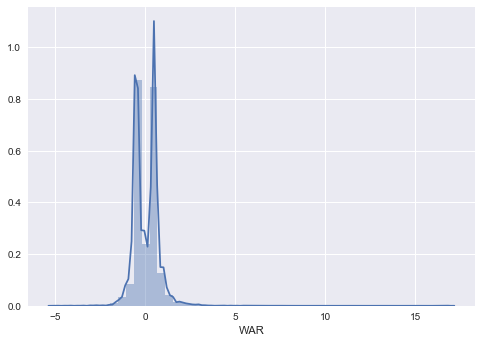

In [400]:
sns.distplot(df_war['WAR'])